## Python Text Basics

#### Introduction to Python Text Basics

In [ ]:
person = 'jose'

In [ ]:
print("my name is {}".format(person))

Python 3.6+ now includes formatted string literals (called f-strings for short). Essentially the f before the string makes it so that you don't have to worry about the .format() call. 

In [ ]:
print(f"my name is {person}")

You can do operations within the f-string literal. See below. This also works for lists. 

In [ ]:
d = {'a':123,
    'b':456}

In [ ]:
print(f"my nummber is {d['a']}")

In [ ]:
library = [('Author','Topic','Pages'),
           ('Twain', 'Rafting', 601),
           ('Feynman','Physics',95),
           ('Hamilton','Mythology',144)]

In [ ]:
for book in library: 
    print(f"Author is {book[0]}")

In [ ]:
# Tuple unpacking
for author, topic, pages in library: 
    print(f"{author} {topic} {pages}")

Notice how our printing is pretty sloppy above. This is because we are not taking into account any sort of padding or any sort of space. There are a variety of ways that we can add using a string literal formatting to fix this issue. The first thing you can do is pass in an argument for a minimum width. What you do is inside these curly braces, after the variable name you provide a colon, another set of curly braces and then a number of minimum number of spaces that should be taken up by this variable. 

In [ ]:
# Tuple unpacking with added widths 
for author, topic, pages in library: 
    print(f"{author:{10}} {topic:{10}} {pages:{10}}")

Notice how the formating for pages looks a bit off. This is because of the way it is trying to alight this string with an integer. The easiest way to fix this is to pass in a greater than sign (>) in between the colon and the braces. 

In [ ]:
# Tuple unpacking with added widths 
for author, topic, pages in library: 
    print(f"{author:{10}} {topic:{10}} {pages:>{10}}")

In [ ]:
from datetime import datetime

In [ ]:
today = datetime(year=2019,month=2,day=28)

In [ ]:
print(f"{today}")

Often times you are going to want to format datetime objects so that they look nicer. What you are going to do is use a specific strf time code/reference. https://strftime.org/. 

In [ ]:
print(f"{today:%B %d, %Y}")

#### Working with Text Files with Python

%% is a magic command. test is the name of the file. 

In [ ]:
%%writefile test.txt
Hello, this is a quick test file. 
This is the second line of the file.

The first thing you should do when you are opening a text file regardless of what library you are using is make sure that you understand the file's location. To find out where you are currently located, you can type `pwd` to find out where your notebook is located. To open up a file, you first create a variable then use `= open(path_to_file)`. If you want to open a text file that is located in a different location than your notebook, you need to provide the entire file path. 

In [ ]:
myfile = open('test.txt')

We can now read the file. 

In [ ]:
myfile.read()

What is interesting is that if you try to read the file again, it comes out blank. You can't call read multiple times on a file. Essentially what is going on is that you have a cursor at the very begining of a text file and after you call .read(), that cursor goes throughout the entire text file and then returns the entire file as a string. Then the cursor is sitting at the end of the file. Which means that when you call read again, it is just going to read from the cursor all the way to the end of the file. Which in this case since we already called read, there is nothing there. It is just an empty string. To fix this you can type `myfile.seek(0)`. The 0 changes the index to position 0 which will reset the cursor. 

In [ ]:
myfile.read()

In [ ]:
myfile.seek(0)

In [ ]:
myfile.read()

.read() is useful for smaller files where you want to grab everything and save it as a string. 

In [ ]:
myfile.seek(0)

content=myfile.read()

In [ ]:
print(content)

You should always close a file once you are done working with it. The reason you want to do that is incase you try opening that text file with another program. If you still have it open in python, it might cause issues with your operating system. 

In [ ]:
myfile.close()

Python has a readlines method that will read each line as a seperate item in a python list. 

In [ ]:
myfile = open('test.txt')

In [ ]:
myfile.readlines()

In [ ]:
myfile.seek(0)

mylines = myfile.readlines()

In [ ]:
print(mylines)

In [ ]:
for line in mylines: 
    print(line.split())

It is actually more common to see .readlines() than just .read(). Remember .read() is to grab everything as one giant string .readlines() is to grab every line as a seperate string and put that into a list. 

Passing w+ allows us to both read and write to the file. w+ should be used with caution. If you open a file with w or w+, it performs a truncation on the original. That means that anything in the original file is actually overwritten and deleted over. 

In [ ]:
myfile = open('test.txt',mode='w+')

In [ ]:
myfile.read()

Notice that myfile has been an empty string. Because by opening it with w+, you are now overiding the original test.txt file. This is why you should use w or w+ with caution. You should only use it when you want to completely overwrite the contents of the file. 

In [ ]:
myfile.write('MY BRAND NEW TEXT') # Returns the number of characters that were writen 

In [ ]:
myfile.seek(0)
myfile.read()

In [ ]:
myfile.close()

Appending to a file will keep the old information and allow you to add new lines. Using a+ allows us to open and append to a file instead of completely overriding it. If a file doesn't exist, a new one will be created. 

In [ ]:
myfile = open('whoops.txt','a+')
myfile.write('My first line in a+ opening')

In [ ]:
myfile.close()

In [ ]:
newfile = open('whoops.txt')

In [ ]:
newfile.read()

We can use a context manager to automatically close the file for you. Previously we always had to say myfile.close(). Because this is a little unsafe because you may forget to write that close line, there is an alias in context manager. This with operator is a context manager that automatically closes the file for you. 

In [ ]:
with open('test.txt','r') as mynewfile: 
    myvariable = mynewfile.readlines()

In [ ]:
myvariable

#### Working with PDF files
Often you may need to read in text data from a PDF file. We can use the **PyPDF2** library to read in text data from a PDF file. Keep in mind: not all PDFs have text data that can be extracted. Some PDFs are created through scanning, instead of being exported from a text editor like Word. These scanned PDFs are more like image files, making it much harder to extract the test. Often this requires specialized software. 

The PyPDF2 library is made to extract text from PDF files directly created from a word processor, but keep in mind, not all word processors created PDFs with extractable text! So even if you exported from a direct word processor, the library may still have difficulty extracting that text. 

In [ ]:
# !pip install PyPDF2

In [ ]:
import PyPDF2

We are going to use the mode rb which means to read in binary method. We need that because we are working with a PDF file. 

In [ ]:
myfile = open('./00-Python-Text-Basics/US_Declaration.pdf', mode = 'rb')

Once you have read in the file using normal Python, you are going to convert it to a PDF file reader object. 

In [ ]:
pdf_reader = PyPDF2.PdfFileReader(myfile)

In [ ]:
pdf_reader.numPages

In [ ]:
page_one = pdf_reader.getPage(0)
print(page_one.extractText())

In [ ]:
myfile.close()

Often you might want to add another page to a PDF. We cannot write python string text directly onto a PDF because of the differences in the single string type in python vs the variety of fonts and placements that a PDF could have. What we can do is copy pages and append pages to the end. So you can copy a page from another PDF or the same PDF and append it to the end of the current PDF you are working with. What you can't do is take a python string and suddenly insert it somewhere into the PDF because there are so many different parameters that a normal PDF file can have. 


Adding a page to a PDF. 

In [ ]:
f = open('./00-Python-Text-Basics/US_Declaration.pdf', mode = 'rb')
pdf_reader = PyPDF2.PdfFileReader(f)

In [ ]:
first_page = pdf_reader.getPage(0)

This writter object is going to be able to add pages. 

In [ ]:
pdf_writer = PyPDF2.PdfFileWriter()

In [ ]:
pdf_writer.addPage(first_page)

In [ ]:
pdf_output = open('My_brand_new.pdf','wb') # this is a pdf file that doesn't already exist
# wb stands for write binary

In [ ]:
pdf_writer.write(pdf_output)

In [ ]:
pdf_output.close()
f.close()

What did we do above? We are reading in a file using PdfFileReader, we are grabbing the first page of the file, then we are creating a PdfFileWriter. Then onto that writer object we are adding that first page that we extracted. Then we are opening a brand new file with the write binary permission then we are going to wirte pdf_output. Then we close both files. Now if we look at 'My_brand_new.pdf' it should have a single page in it. 

In [ ]:
brand_new = open('My_brand_new.pdf','rb')

pdf_reader = PyPDF2.PdfFileReader(brand_new)
pdf_reader.numPages

In [ ]:
f = open('./00-Python-Text-Basics/US_Declaration.pdf','rb')

pdf_text = [] # 0 is a place holder
pdf_reader = PyPDF2.PdfFileReader(f)

for p in range(pdf_reader.numPages):
    
    page = pdf_reader.getPage(p)
    pdf_text.append(page.extractText())
    
f.close()

In [ ]:
pdf_text

In [ ]:
for page in pdf_text: 
    print(page,'\n','\n','\n','\n')

#### Regular Expressions
What if you want to find every phone number or email adress in a document? You know that certain types of objects always hold the same format. What we need is a regular expression to search for the pattern of what we are looking for instead of any specific sequence.

Regular expressions allow for pattern searching in a text document. The key thing to keep in mind is that every character type has a corresponding pattern code. For example, digits have the placeholder pattern code of `\d`. The usr of the backslash allows python to understand that this is a special code and not the letter d. You can then combine this with other special character codes in order to find any pattern you can think of. 
- example: `r'\d{3}-\d{3}-\d{4}'`
    - all this is saying is find a set of three digits, then a dash, then another set of three digits, then a dash, and then a set of four digits. 
    
Below you can find a table of all possible identifiers: 

| Character | Description |
| --- | --- |
| \d | A digit |
| \w| Alphanumeric |
|\s| White space |
|\D | A non digit |
|\W | Non-alphanumeric |
|\S| Non-whitespace |

    
**Quantifiers**

| Character | Description |
| --- | --- |
| + | occurs one or more times |
| {3}| occurs exactly 3 times |
| {2,4}| occurs 2 to 4 times |
| {3,} | occurs 3 or more times |
| * | occurs zero or more times |
|? | occurs once or none |


In [ ]:
text = "The phone number of the agent is 408-555-1234. Call soon!"

In [ ]:
import re

In [ ]:
pattern = "phone"
re.search(pattern,text) # you get back this match object

There are different methods and attributes that this match object has.

In [ ]:
my_match = re.search(pattern,text)

In [ ]:
my_match.span() # starting at index 4 of the string, up to index 9

If the pattern occurs more than one time, it is only going to find the first instance. 

In [ ]:
text = "my phone is a new phone"
match = re.search(pattern,text)
match.span()

If you want to find all of the matches instead of only the first instance, the correct code is `re.findall`

In [ ]:
all_matches = re.findall("phone",text)
for match in re.finditer("phone",text): 
    print(match.span())

We just learned how to search for specific strings, but we want to look for generalized patterns. We may not know what exact sequence of letters we are looking for, we may just know a general pattern of how they are formatted. 

In [ ]:
text = 'My telephone number is 777-555-1234'
text

In [ ]:
pattern = r'\d{3}-\d{3}-\d{4}'
phone_number = re.search(pattern,text)
phone_number.group() # will group together everything it found to be matching 

We also have the ability to grab seperate groups. Currently `r'\d{3}-\d{3}-\d{4}'` is one solid group. But you can compile seperate groups using parentheses. You can use this to call individual groups, note that the index starts at 1. This is useful for things like getting the area code. 

In [ ]:
pattern = r'(\d{3})-(\d{3})-(\d{4})'
phone_number = re.search(pattern,text)
phone_number.group(1) 

**pipe operator**. You can use the pipe operator to have an or statement. 

In [ ]:
text = 'this man was here'
re.search(r"man|woman",text)

**wild card character** You can use a wildcard as a placement that will match any character placed there. The period is the wildcard character. 

In [ ]:
text = "The cat in the hat sat"
re.findall(r".at",text)

Maybe you are just interested in things that start with or end with a particular type of character. You can use the carrot `^` in order to say starts with. The dollar sign `$` signals ends with. 

In [ ]:
re.findall(r"\d$","This ends with a number 2")

In [ ]:
re.findall(r"^\d","1 is the loneliest number")

To exclude characters you can use the carrot symbol in conjunction with a set of brackets. Lets imaging you wanted to get rid of all the numbers inside this sentence. When the carrot is inside the square brackets that is going to indicate exclusion. 

In [ ]:
phrase = "there are 3 numbers 34 inside 5 this sentence"

In [ ]:
re.findall(r"[^\d]",phrase)

In [ ]:
# Adding a + sign will get all the words back together
re.findall(r"[^\d]+",phrase)

We can use this to remove punctuation from a sentence which is a common thing you have to do when working with NLP. 

In [ ]:
test_phrase = "This is a string! But it has punctuation. How to remove it?"

In [ ]:
my_list = re.findall(r"[^!.?]+",test_phrase)

In [ ]:
print(my_list)

In [ ]:
my_list = ' '.join(my_list)
print(my_list)

The plus sign along with brackets allows for grouping. 

In [ ]:
text = "Only find the hyphen-words. Were are the long-ish dash words?"

Lets imagine a situation where we want to find any words that have this hyphen in it.`r"[\w]+"` indicates to grab any number of alpha numerics. Notice that we didn't have to specify how long we expected either side of characters on the dash to be. 

In [ ]:
re.findall(r"[\w]+-\w+",text)

What is Spacy? 
- open source natural language process library
- designed to effectively handle NLP tasks with the most efficient implementation of common algorithms 
- for many NLP tasks, Spacy only has one implemented method, choosing the most efficient algorithm currently available. 
- this means you often don't have the option to choose other algorithms. 

What is NLTK? 
- NLTK - Natural Language Toolkit is a very popular open source library. 
- initially released in 2001, it is much older than Spacy (released in 2015).
- it includes many functionalities, but includes less efficient implementations.


NLTK vs Spacy
- for many common NLP tasks, Spacy is much faster and more efficient, at the cost of the user not being able to choose algorithmic implementations. 
- however, spacy does not include pre-created models for some applications, such as sentiment analysis, which is typically easier to perform with NLTK. 

In [ ]:
# import sys
# !{sys.executable} -m pip install spacy
# !{sys.executable} -m spacy download en

What is NLP?
- Natural language processing (NLP) is an area of computer science and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data. 
- A computer needs specialized processing techniques in order to "understand" raw text data. 
- NLP attempts to use a variety of techniques in order to create structure out of text data. 

Example use cases of NLP
- classifying emails as spam vs legitimate
- sentiment analysis of text movie reviews
- analyzing trends from written customer feedback forms
- understanding text commands, "Hey Google, play this song". 

Spacy Basics
- There are a few key steps for working with Spacy that we will cover in this lecture: 
    - Loading the language library
    - Building a Pipeline Object
    - Using Tokens
    - Parts-of-Speech Tagging
    - Understanding Token Attributes 
- Spacy works with a pipeline object
- The **nlp()** function from Spacy automatically takes raw text and performs a series of operations to tag, parse, and describe the text data. 

In [ ]:
import spacy

# Load the language library
nlp = spacy.load('en')

# Create a document object
doc = nlp(u'Tesla is looking at buying U.S. startup for $6 million') # u stands for unicode

Using the language library that we just loaded, it is going to parse this string into seperate components for us. It is going to parse it into what are known as tokens. Each word is going to become a token.

In [ ]:
for token in doc: 
    print(token.text, token.pos) #pos stands for part of speech

Notice that it is smart enough to treat U.S. as a single token. Spacy through a lot of development is smart enough to realize that we are talking about the country U.S.. It is also smart enough to realize that the $ sign and the 6 should be seperated. Each of these numbers corresponds to a part of speech like adverb, nount, etc. If you want the name of the pos just add an underscore. 

In [ ]:
for token in doc: 
    print(token.text, token.pos_) #pos stands for part of speech

In [ ]:
for token in doc: 
    print(token.text, token.pos_,token.dep_) # dep stands for syntactic dependency

In [ ]:
nlp.pipeline

When we run nlp our text is entering a processing pipeline that first breaks down the text and then performs that series of operations of tagging, parsing, and describing the data. ner stands for named entity recognizer. 

The very first step in processing any text is to split up all the component parts (e.g., words and punctuation) into tokens. These tokens are annotated inside the doc object to contain descriptive information.

In [ ]:
doc2 = nlp(u"Tesla isn't looking into startups anymore.")

In [ ]:
for token in doc2: 
    print(token.text, token.pos_,token.dep_)

Notice how isn't is split into two tokens. Spacy recognizes both the root verb is and the negation attached to it. Notice that both the extended white space and the period at the end of the sentence are assigned their own tokens. 

In [ ]:
doc2 = nlp(u"Tesla isn't looking into startups anymore.")

In [ ]:
for token in doc2: 
    print(token.text, token.pos_,token.dep_)

In [ ]:
doc2 = nlp(u"Tesla isn't         looking into startups anymore.")

for token in doc2: 
    print(token.text, token.pos_,token.dep_)

Notice how this space becomes a token. We can also use indexing to grab tokens individually. 

In [ ]:
doc2[0]


| Tag | Description |
| --- | --- |
| .text | The original word text |
| .lemma_ | The base form of the word |
| .pos_| The simple part-of-speech tag |
| .tag_ | The detailed part-of-speech tag |
|.shape_| The word shape - capitalization, punctuation, digits |
|.is_alpha| Is the token an alpha character? |
|.is_stop| Is the token part of a stop list, i.e., the most common words of the language|

Note spacy is doing all of this based on the fact that we loaded in this library.

Large doc objects can be hard to work with sometimes. A span is a slice of a doc object in the form of some start vs some stop. 

In [ ]:
doc3 = nlp(u'Although commmonly attributed to John Lennon from his song "Beautiful Boy", \
the phrase "Life is what happens to us while we are making other plans" was written by \
cartoonist Allen Saunders and published in Reader\'s Digest in 1957, when Lennon was 17.')

In [ ]:
life_quote = doc3[16:30]

In [ ]:
print(life_quote) # this is a span of doc3

What is interesting is that eventhough we are only grabbing a section of this document, spacy is smart enough to know that life_quote is a span. 

In [ ]:
type(life_quote)

In [ ]:
type(doc3)

Certain tokens inside a doc object may also receive a start of sentence tag. These tags enable the generation of sentence segments. 

In [ ]:
doc4 = nlp(u"This is the first sentence. This is another sentence. This is the last sentence.")

In [ ]:
for sentence in doc4.sents: # spacy automatically understands that this period and space is a sentence
    print(sentence)

In [ ]:
doc4[0].is_sent_start

#### Tokenization
Tokenization is the process of breaking up the original text into component pieces (tokens). You can imagine that we have some original text. The very first step is to split on white space. 
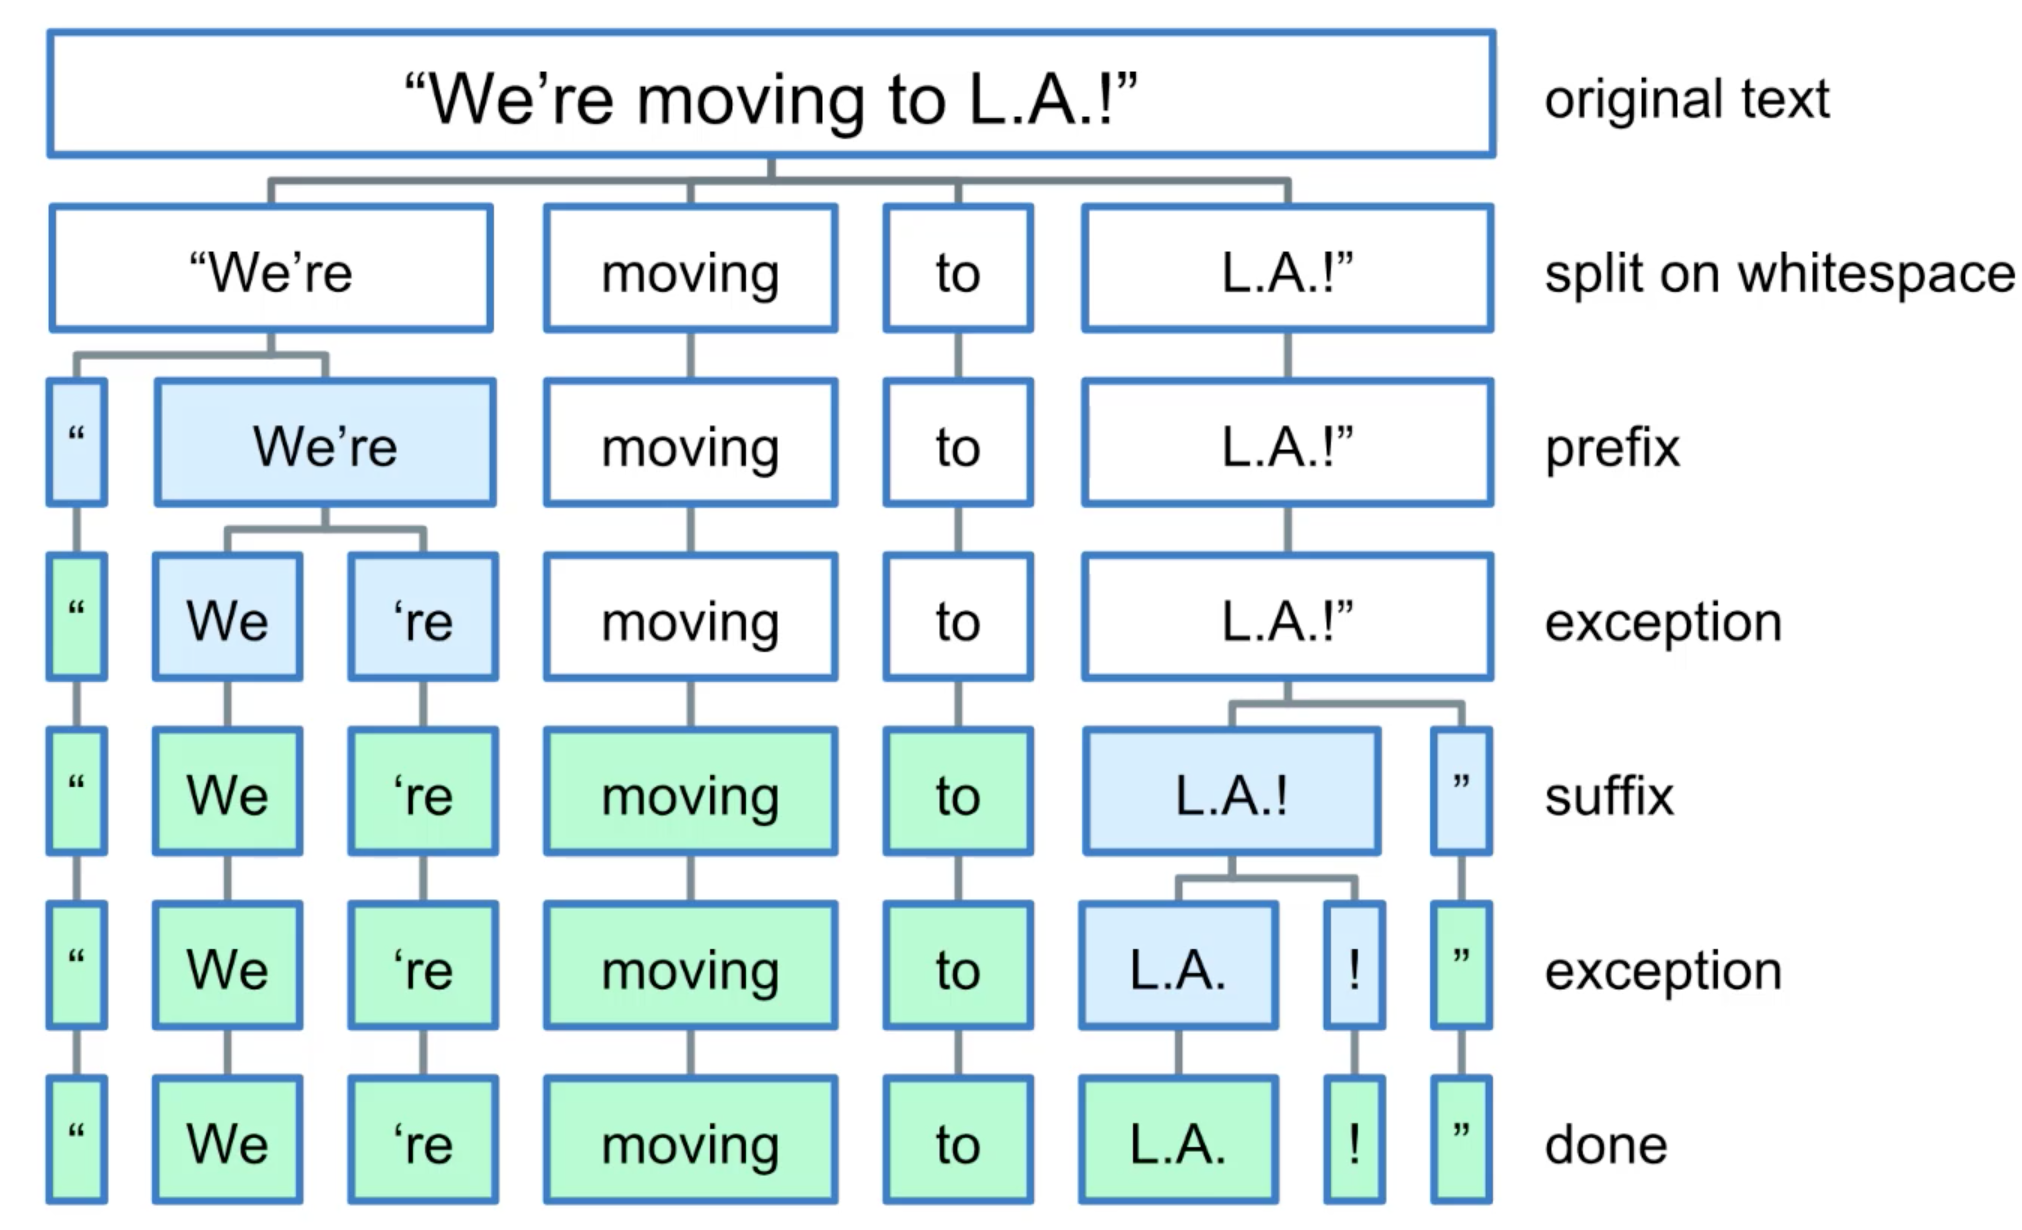

Notice that tokens are pieces of the original text. We don't see any conversion to word stems or lemmas (base forms of words) and we haven't seen anything about organizations/places/money etc. 

Tokens are the basic building blocks of a Doc object - everything that helps us understand the meaning of the text is derived from tokens and their relationship to one another. 

- **Prefix**: character(s) at the beginning
- **Suffix**: character(s) at the end
- **Infix**: character(s) in between
- **Exception**: special-case rule to split a string into several tokens or prevent a token from being split when punctuation rules are applied. 

In [ ]:
mystring = '"We\'re moving to L.A.!"' # the reason I am using a \ is so that this single quote between we and re isn't actually going to break up the string

Remember, we are using this backslash as an escape character in order to not stop the string too early. 

In [ ]:
print(mystring)

In [ ]:
doc = nlp(mystring)

for token in doc: 
    print(token.text)

Spacy is going to isolate punctuation that does not form an integral part of a word. Things like quotation marks, commas, punctuation at the end of the sentence will be assigned their own token. However, punctuation that exists as a part of an email address, website, or numerical value will be kept as part of the token. 

Remember everything is happening under the hood. You don't have to tell spacy what rules to expect, it is smart enough to understand that on its own. 

In [ ]:
doc2 = nlp(u"We're here to help! Send snail-mail, email support@oursite.com or visit us at http://www.oursite.com")

In [ ]:
for token in doc2: 
    print(token.text)

In [ ]:
doc3 = nlp(u"A 5km NYC cab ride costs $10.30")

for token in doc3:
    print(token.text)

In [ ]:
doc4 = nlp(u"Let's visit St. Louis in the U.S. next year.")

for token in doc4: 
    print(token.text)

If you ever want to count the number of tokens, just use len(). 

In [ ]:
len(doc4)

Keep in mind that tokens cannot be re-assigned. Although document objects can be considered lists of tokens, they do not support item re-assignment. Spacy can go a step beyond simple tokens. It can actually understand named entities. Named entities add another layer of context. The language model that you load in at the very top recognizes that certain words are organization names while others are locations. Other combinations relate to things like money or dates. Named entities are accesible through the ents property of a document object. 

In [ ]:
doc8 = nlp(u"Apple to build a Hong Kong factory for $6 million")

for token in doc8: 
    print(token.text, end = ' | ')

In [ ]:
for entity in doc8.ents: 
    print(entity, '|', entity.label_,'|', str(spacy.explain(entity.label_)))

Off of this string spacy is smart enough to figure out that there is something special about Apple, Hong Kong, and $6 million. I recognized that Apple, Hong Kong, and $6 million are named entities. Basically there is more context to these particular words. 

We also have noun chunks which are another object property. You can think of noun chunks as nouns + the words describing them. 

In [ ]:
doc9 = nlp(u"Autonomous cars shift insurance liability toward manufacturers.")

In [ ]:
for chunk in doc9.noun_chunks: 
    print(chunk)

#### Tokenization Visualized
Displacy is the built in visualizer. 

In [ ]:
from spacy import displacy

In [ ]:
doc = nlp(u"Apple is going to build a U.K. factory for $6 million.")

In [ ]:
displacy.render(doc, style = 'dep',jupyter = True, options = {'distance':110})

In [ ]:
doc = nlp(u"Over the last quarter Apple sold nearly 20 thousand iPods for a profit of $6 million")

In [ ]:
displacy.render(doc,style='ent',jupyter = True)

#### Stemming
- Often when searching text for a certain keyword, it helps if the search returns variations of the word.
- For instance, searching for "boat" might also return "boats" and "boating". Here, "boat" would be the stem for [boat,boater,boating,boats]
- stemming is a somewhat crude method for cataloging related words; it essentially chops off letters from the end until the stem is reached. 
- this works fairly well in most cases, but unfortunately English has many exceptions where a more sophisticated process is required. 
- in fact, spaCy doesn't include a stemmer, opting instead to rely entirely on lemmatization. But you will often hear about stemming in NLP discussion, so it is important that you have an understanding of stemming before you move onto lemmatization. 

- Because of this decision to not include Stemming in Spacy, we will jump over to NLTK and learn about various Stemmers. 
    - We'll show both the Porter Stemmer and the Snowball Stemmer. 
    
- One of the most common - and effective - stemming tools is Porter's Algorithm developed by Martin Porter in 1980. The algorithm employs five phases of word reduction, each with its own set of mapping rules. 

In the first phase, simple suffix mapping rules are defined. From a given set of stemming rules only one rule is applied, based on the longest suffix S1. Thus, caresses reduces to caress but not cares.

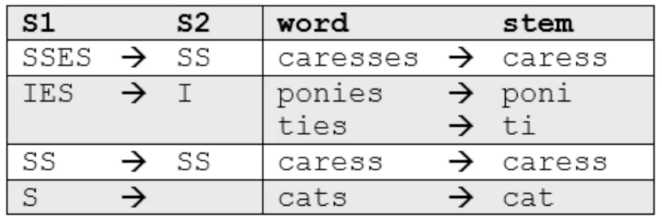

There are more sophisticated phases that consider the length/complexity of the word before applying a rule. 

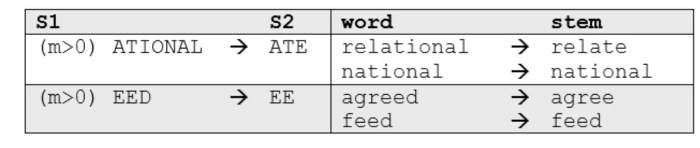

Snowball is the name of another stemming language also developed by Martin Porter. The algorithm used here is more accurately called the "English Stemmer" or "Porter2 Stemmer". It offers a slight improvement over the original Porter stemmer, both in logic and speed. 

In [ ]:
import nltk
from nltk.stem.porter import PorterStemmer

In [ ]:
# Create an instance of this PorterStemmer object 
p_stemmer = PorterStemmer()

In [ ]:
words = ['run','runner','ran','runs','easily','fairly','fairness']

The way you stem down these words is that you pass them into the stem method of this PorterStemmer. 

In [ ]:
for word in words: 
    print(word + "---->" + p_stemmer.stem(word))

In [ ]:
from nltk.stem.snowball import SnowballStemmer

In [ ]:
# Create an instance
s_stemmer = SnowballStemmer(language='english')

In [ ]:
for word in words: 
    print(word + "---->" + s_stemmer.stem(word))

Typically it is not a matter of predicting what the stem will be. The actual stem itself is not super important. What is important is that you understand the process that is happening here. There are some set of algorithmic rules that these stemmers are following to reduce down these words to some kind of root idea/word.  

In [ ]:
words = ['generous','generation','generously','generate']

In [ ]:
for word in words: 
    print(word + "---->" + s_stemmer.stem(word))

Often people like to perform stemming before they run analysis in order to reduce words to their root. As mentioned, spaCy doesn't have stemming because it figures that lammitization is a much more effective way of reducing these words. 

#### Lemmatization
- In contrast to stemming, lemmatization looks beyond word reduction and considers a language's full vocabulary to apply a morphological analysis to words. 
- the lemma of "was" is "be" and the lemma of "mice" is "mouse". So we are not just shortening words or cutting off the ends of them. Instead we are looking at the whole context of the word. The lemma of "meeting" might be "meet" or "meeting" depending on its use in a sentence. 
    - Lemmatization looks at surrounding text to determine a given word's part of speech, it does not categorize phrases.
- Lemmatization is typically seen as much more informative than simple stemming, which is why Spacy has opted to only have Lemmatization available. 

In [ ]:
import spacy 
nlp = spacy.load('en')

In [ ]:
doc1 = nlp(u"I am a runner running in a race because I love to run since I ran today.")

In [ ]:
for token in doc1: 
    print(token.text,'\t', token.pos_,'\t',token.lemma,'\t',token.lemma_)

The number that is returned above is going to point to a specific lemma inside this language library. You can use this hash code as a lookup for this english language library. What is interesting to note is that some of these words are getting reduced down to the same lemma eventhough they are getting used in different tenses. You notice that the way this is printed out is a bit sloppy. Lets create a function using f-string formatting to make it look nicer. 

In [ ]:
def show_lemmas(text):
    for token in text: 
        print(f'{token.text:{12}} {token.pos_:{6}} {token.lemma: <{22}} {token.lemma_}')

In [ ]:
doc2 = nlp(u'I saw ten mice today!')

In [ ]:
show_lemmas(doc2)

Take away: lemmatization is a more informative way to reduce words down to their true roots. It is also going to take account the way the words are used in the sentence. 

#### Stop words
- Words like "a" and "the" appear so frequently that they don't require tagging as thoroughly as nouns, verbs, and modifiers. These words don't give you any additional information and can sometimes hurt your natural language processing. 
- We call these stop words, and they can be filtered from the text to be processed
- Spacy holds a built-in list of some 305 English stop words

In [ ]:
print(nlp.Defaults.stop_words)

There may be times when you wish to add a stop word to the default set that you saw above. 

In [ ]:
# Adding stop words
nlp.Defaults.stop_words.add('btw')

In [ ]:
nlp.vocab['btw'].is_stop = True

# Checking that the word was added to stop words
nlp.vocab['btw'].is_stop

In [ ]:
# Removing stop words
nlp.Defaults.stop_words.remove('beyond')

In [ ]:
nlp.vocab['beyond'].is_stop = False

# Checking that the word was removed from stop words
nlp.vocab['beyond'].is_stop

#### Phrase Matching and Vocabulary
- so far we've seen how a body of text is divided into tokens, and how individual tokens are parsed and tagged with parts of speech, dependencies and lemmas. 
- in this lecture we will identify and label specific phrases that match patterns we can define ourselves
- we can think of this as a powerful version of Regular Expression where we actually take parts of speech into account for our pattern search

**Rule based matching**
SpaCy offers a rule based matching tool called matcher. That allows you to build a library of token patterns, then match those patterns against a doc object to return a list of found matches. You can match on any part of the token including text and annotations. You can add multiple patterns to the same matcher. 

In [ ]:
from spacy.matcher import Matcher

In [ ]:
# Create a Matcher object
matcher = Matcher(nlp.vocab)

We are going to read a document or a string in and we are going to try to find solarpower. Solarpower can appear in the following ways. We want to detect it if it appears as one word (solarpower), if it appears with a dash in the middle (solar-power), or if it appears as two words (solar power). We are basically going to try to detect all three of these patterns. 

In [ ]:
# SolarPower
pattern1 = [{'LOWER': 'solarpower'}]

# Solar-power
pattern2 = [{'LOWER':'solar'},{'IS_PUNCT':True},{'LOWER':'power'}]

# Solar Power
pattern3 = [{'LOWER': 'solarpower'},{'LOWER':'power'}]

So we have these three patterns, now it is time to add them to our matcher. 

In [ ]:
matcher.add('SolarPower',None,pattern1,pattern2,pattern3) # (name_matcher,call backs, patterns)

In [ ]:
doc = nlp(u"The Solar Power industry continues to grow as solarpower increases. Solar-power is amazing")

In [ ]:
# Find the matches
found_matches = matcher(doc)
print(found_matches)

This returns tuples with three pieces of information. The first piece of information is the match id, then it indicates the start, and the stop token. You can make token rules optional by passing in the OP* argument. This allows us to streamline our patterns list. 

This found both two-word patterns, with and without the hyphen!

The following quantifiers can be passed to the `'OP'` key:
<table><tr><th>OP</th><th>Description</th></tr>

<tr ><td><span >\!</span></td><td>Negate the pattern, by requiring it to match exactly 0 times</td></tr>
<tr ><td><span >?</span></td><td>Make the pattern optional, by allowing it to match 0 or 1 times</td></tr>
<tr ><td><span >\+</span></td><td>Require the pattern to match 1 or more times</td></tr>
<tr ><td><span >\*</span></td><td>Allow the pattern to match zero or more times</td></tr>
</table>


## Other token attributes
Besides lemmas, there are a variety of token attributes we can use to determine matching rules:
<table><tr><th>Attribute</th><th>Description</th></tr>

<tr ><td><span >`ORTH`</span></td><td>The exact verbatim text of a token</td></tr>
<tr ><td><span >`LOWER`</span></td><td>The lowercase form of the token text</td></tr>
<tr ><td><span >`LENGTH`</span></td><td>The length of the token text</td></tr>
<tr ><td><span >`IS_ALPHA`, `IS_ASCII`, `IS_DIGIT`</span></td><td>Token text consists of alphanumeric characters, ASCII characters, digits</td></tr>
<tr ><td><span >`IS_LOWER`, `IS_UPPER`, `IS_TITLE`</span></td><td>Token text is in lowercase, uppercase, titlecase</td></tr>
<tr ><td><span >`IS_PUNCT`, `IS_SPACE`, `IS_STOP`</span></td><td>Token is punctuation, whitespace, stop word</td></tr>
<tr ><td><span >`LIKE_NUM`, `LIKE_URL`, `LIKE_EMAIL`</span></td><td>Token text resembles a number, URL, email</td></tr>
<tr ><td><span >`POS`, `TAG`, `DEP`, `LEMMA`, `SHAPE`</span></td><td>The token's simple and extended part-of-speech tag, dependency label, lemma, shape</td></tr>
<tr ><td><span >`ENT_TYPE`</span></td><td>The token's entity label</td></tr>

</table>

Lets say you were no longer interested in this solar power matcher and you weren't interested in any of these old patterns anymore. You wanted an update. Instead of adding to the matcher, you can remove from the matcher. 

In [ ]:
matcher.remove('SolarPower')

In [ ]:
pattern1 = [{'LOWER': 'solarpower'}]
pattern2 = [{'LOWER': 'solar'},{'IS_PUNCT':True,'OP':'*'},{'LOWER': 'power'}]

`'OP':'*'` allows this pattern to match zero or more times. This can help us if we have double hyphens instead of a single piece of punctuation. 

In [ ]:
matcher.add('SolarPower',None, pattern1,pattern2)

In [ ]:
doc2 = nlp(u"Solar--power is solarpower yay!")

In [ ]:
found_matches = matcher(doc2)
print(found_matches)

In the previous lecture we saw how we can use token patterns to perform rule based matching. An alternative more efficient method is to match on a terminology list. In that case we are going to use a phrase matcher in order to create a document object from a list of phrases and pass that into the matcher instead. 

In [ ]:
from spacy.matcher import PhraseMatcher

In [ ]:
matcher = PhraseMatcher(nlp.vocab)

In [ ]:
pwd

In [ ]:
with open('./TextFiles/reaganomics.txt',encoding='unicode_escape') as f: 
    doc3 = nlp(f.read())

In [ ]:
phrase_list = ['voodoo economic','supply-side economics',
              'trickle-down economics','free-market economics']

In [ ]:
# Convert each phrase into a document object
phrase_patterns = [nlp(text) for text in phrase_list]

In [ ]:
phrase_patterns

In [ ]:
type(phrase_patterns[0])

In [ ]:
# Grab each document and pass it in individually to the matcher
matcher.add('EconMatcher',None,*phrase_patterns)

In [ ]:
found_matches = matcher(doc3) #pass in the document that we are trying to search

In [ ]:
found_matches

In [ ]:
for match_id, start, end in found_matches: 
    string_id = nlp.vocab.strings[match_id] # get string representation
    span = doc3[start:end]
    print(match_id,string_id, start,end,span.text)

#### Parts of Speech
The challenge of correctly identifying parts of speech is summed up nicely in the [spaCy docs](https://spacy.io/usage/linguistic-features):
<div class="alert alert-info" style="margin: 20px">Processing raw text intelligently is difficult: most words are rare, and it's common for words that look completely different to mean almost the same thing. The same words in a different order can mean something completely different. Even splitting text into useful word-like units can be difficult in many languages. While it's possible to solve some problems starting from only the raw characters, it's usually better to use linguistic knowledge to add useful information. That's exactly what spaCy is designed to do: you put in raw text, and get back a **Doc** object, that comes with a variety of annotations.</div>
In this section we'll take a closer look at coarse POS tags (noun, verb, adjective) and fine-grained tags (plural noun, past-tense verb, superlative adjective).
- SpaCy gives us two POS tags:
    1. Coarse POS tags (noun, verb, adjective)
    2. Fine-grained tags (plural noun, past-tense verb, superlative adjective)

In [ ]:
# Perform standard imports
import spacy
nlp = spacy.load('en')

In [ ]:
# Create a simple Doc object
doc = nlp(u"The quick brown fox jumped over the lazy dog's back.")

## View token tags
Recall that you can obtain a particular token by its index position.
* To view the coarse POS tag use `token.pos_`
* To view the fine-grained tag use `token.tag_`
* To view the description of either type of tag use `spacy.explain(tag)`

<div class="alert alert-success">Note that `token.pos` and `token.tag` return integer hash values; by adding the underscores we get the text equivalent that lives in **doc.vocab**.</div>

In [ ]:
# Print the full text:
print(doc.text)

In [ ]:
# Print the fifth word and associated tags:
print(doc[4].text, doc[4].pos_, doc[4].tag_, spacy.explain(doc[4].tag_))

In [ ]:
for token in doc:
    print(f'{token.text:{10}} {token.pos_:{8}} {token.tag_:{6}} {spacy.explain(token.tag_)}')

## Coarse-grained Part-of-speech Tags
Every token is assigned a POS Tag from the following list:


<table><tr><th>POS</th><th>DESCRIPTION</th><th>EXAMPLES</th></tr>
    
<tr><td>ADJ</td><td>adjective</td><td>*big, old, green, incomprehensible, first*</td></tr>
<tr><td>ADP</td><td>adposition</td><td>*in, to, during*</td></tr>
<tr><td>ADV</td><td>adverb</td><td>*very, tomorrow, down, where, there*</td></tr>
<tr><td>AUX</td><td>auxiliary</td><td>*is, has (done), will (do), should (do)*</td></tr>
<tr><td>CONJ</td><td>conjunction</td><td>*and, or, but*</td></tr>
<tr><td>CCONJ</td><td>coordinating conjunction</td><td>*and, or, but*</td></tr>
<tr><td>DET</td><td>determiner</td><td>*a, an, the*</td></tr>
<tr><td>INTJ</td><td>interjection</td><td>*psst, ouch, bravo, hello*</td></tr>
<tr><td>NOUN</td><td>noun</td><td>*girl, cat, tree, air, beauty*</td></tr>
<tr><td>NUM</td><td>numeral</td><td>*1, 2017, one, seventy-seven, IV, MMXIV*</td></tr>
<tr><td>PART</td><td>particle</td><td>*'s, not,*</td></tr>
<tr><td>PRON</td><td>pronoun</td><td>*I, you, he, she, myself, themselves, somebody*</td></tr>
<tr><td>PROPN</td><td>proper noun</td><td>*Mary, John, London, NATO, HBO*</td></tr>
<tr><td>PUNCT</td><td>punctuation</td><td>*., (, ), ?*</td></tr>
<tr><td>SCONJ</td><td>subordinating conjunction</td><td>*if, while, that*</td></tr>
<tr><td>SYM</td><td>symbol</td><td>*$, %, §, ©, +, −, ×, ÷, =, :), 😝*</td></tr>
<tr><td>VERB</td><td>verb</td><td>*run, runs, running, eat, ate, eating*</td></tr>
<tr><td>X</td><td>other</td><td>*sfpksdpsxmsa*</td></tr>
<tr><td>SPACE</td><td>space</td></tr>

___
## Fine-grained Part-of-speech Tags
Tokens are subsequently given a fine-grained tag as determined by morphology:
<table>
<tr><th>POS</th><th>Description</th><th>Fine-grained Tag</th><th>Description</th><th>Morphology</th></tr>
<tr><td>ADJ</td><td>adjective</td><td>AFX</td><td>affix</td><td>Hyph=yes</td></tr>
<tr><td>ADJ</td><td></td><td>JJ</td><td>adjective</td><td>Degree=pos</td></tr>
<tr><td>ADJ</td><td></td><td>JJR</td><td>adjective, comparative</td><td>Degree=comp</td></tr>
<tr><td>ADJ</td><td></td><td>JJS</td><td>adjective, superlative</td><td>Degree=sup</td></tr>
<tr><td>ADJ</td><td></td><td>PDT</td><td>predeterminer</td><td>AdjType=pdt PronType=prn</td></tr>
<tr><td>ADJ</td><td></td><td>PRP\$</td><td>pronoun, possessive</td><td>PronType=prs Poss=yes</td></tr>
<tr><td>ADJ</td><td></td><td>WDT</td><td>wh-determiner</td><td>PronType=int rel</td></tr>
<tr><td>ADJ</td><td></td><td>WP\$</td><td>wh-pronoun, possessive</td><td>Poss=yes PronType=int rel</td></tr>
<tr><td>ADP</td><td>adposition</td><td>IN</td><td>conjunction, subordinating or preposition</td><td></td></tr>
<tr><td>ADV</td><td>adverb</td><td>EX</td><td>existential there</td><td>AdvType=ex</td></tr>
<tr><td>ADV</td><td></td><td>RB</td><td>adverb</td><td>Degree=pos</td></tr>
<tr><td>ADV</td><td></td><td>RBR</td><td>adverb, comparative</td><td>Degree=comp</td></tr>
<tr><td>ADV</td><td></td><td>RBS</td><td>adverb, superlative</td><td>Degree=sup</td></tr>
<tr><td>ADV</td><td></td><td>WRB</td><td>wh-adverb</td><td>PronType=int rel</td></tr>
<tr><td>CONJ</td><td>conjunction</td><td>CC</td><td>conjunction, coordinating</td><td>ConjType=coor</td></tr>
<tr><td>DET</td><td>determiner</td><td>DT</td><td>determiner</td><td></td></tr>
<tr><td>INTJ</td><td>interjection</td><td>UH</td><td>interjection</td><td></td></tr>
<tr><td>NOUN</td><td>noun</td><td>NN</td><td>noun, singular or mass</td><td>Number=sing</td></tr>
<tr><td>NOUN</td><td></td><td>NNS</td><td>noun, plural</td><td>Number=plur</td></tr>
<tr><td>NOUN</td><td></td><td>WP</td><td>wh-pronoun, personal</td><td>PronType=int rel</td></tr>
<tr><td>NUM</td><td>numeral</td><td>CD</td><td>cardinal number</td><td>NumType=card</td></tr>
<tr><td>PART</td><td>particle</td><td>POS</td><td>possessive ending</td><td>Poss=yes</td></tr>
<tr><td>PART</td><td></td><td>RP</td><td>adverb, particle</td><td></td></tr>
<tr><td>PART</td><td></td><td>TO</td><td>infinitival to</td><td>PartType=inf VerbForm=inf</td></tr>
<tr><td>PRON</td><td>pronoun</td><td>PRP</td><td>pronoun, personal</td><td>PronType=prs</td></tr>
<tr><td>PROPN</td><td>proper noun</td><td>NNP</td><td>noun, proper singular</td><td>NounType=prop Number=sign</td></tr>
<tr><td>PROPN</td><td></td><td>NNPS</td><td>noun, proper plural</td><td>NounType=prop Number=plur</td></tr>
<tr><td>PUNCT</td><td>punctuation</td><td>-LRB-</td><td>left round bracket</td><td>PunctType=brck PunctSide=ini</td></tr>
<tr><td>PUNCT</td><td></td><td>-RRB-</td><td>right round bracket</td><td>PunctType=brck PunctSide=fin</td></tr>
<tr><td>PUNCT</td><td></td><td>,</td><td>punctuation mark, comma</td><td>PunctType=comm</td></tr>
<tr><td>PUNCT</td><td></td><td>:</td><td>punctuation mark, colon or ellipsis</td><td></td></tr>
<tr><td>PUNCT</td><td></td><td>.</td><td>punctuation mark, sentence closer</td><td>PunctType=peri</td></tr>
<tr><td>PUNCT</td><td></td><td>''</td><td>closing quotation mark</td><td>PunctType=quot PunctSide=fin</td></tr>
<tr><td>PUNCT</td><td></td><td>""</td><td>closing quotation mark</td><td>PunctType=quot PunctSide=fin</td></tr>
<tr><td>PUNCT</td><td></td><td>``</td><td>opening quotation mark</td><td>PunctType=quot PunctSide=ini</td></tr>
<tr><td>PUNCT</td><td></td><td>HYPH</td><td>punctuation mark, hyphen</td><td>PunctType=dash</td></tr>
<tr><td>PUNCT</td><td></td><td>LS</td><td>list item marker</td><td>NumType=ord</td></tr>
<tr><td>PUNCT</td><td></td><td>NFP</td><td>superfluous punctuation</td><td></td></tr>
<tr><td>SYM</td><td>symbol</td><td>#</td><td>symbol, number sign</td><td>SymType=numbersign</td></tr>
<tr><td>SYM</td><td></td><td>\$</td><td>symbol, currency</td><td>SymType=currency</td></tr>
<tr><td>SYM</td><td></td><td>SYM</td><td>symbol</td><td></td></tr>
<tr><td>VERB</td><td>verb</td><td>BES</td><td>auxiliary "be"</td><td></td></tr>
<tr><td>VERB</td><td></td><td>HVS</td><td>forms of "have"</td><td></td></tr>
<tr><td>VERB</td><td></td><td>MD</td><td>verb, modal auxiliary</td><td>VerbType=mod</td></tr>
<tr><td>VERB</td><td></td><td>VB</td><td>verb, base form</td><td>VerbForm=inf</td></tr>
<tr><td>VERB</td><td></td><td>VBD</td><td>verb, past tense</td><td>VerbForm=fin Tense=past</td></tr>
<tr><td>VERB</td><td></td><td>VBG</td><td>verb, gerund or present participle</td><td>VerbForm=part Tense=pres Aspect=prog</td></tr>
<tr><td>VERB</td><td></td><td>VBN</td><td>verb, past participle</td><td>VerbForm=part Tense=past Aspect=perf</td></tr>
<tr><td>VERB</td><td></td><td>VBP</td><td>verb, non-3rd person singular present</td><td>VerbForm=fin Tense=pres</td></tr>
<tr><td>VERB</td><td></td><td>VBZ</td><td>verb, 3rd person singular present</td><td>VerbForm=fin Tense=pres Number=sing Person=3</td></tr>
<tr><td>X</td><td>other</td><td>ADD</td><td>email</td><td></td></tr>
<tr><td>X</td><td></td><td>FW</td><td>foreign word</td><td>Foreign=yes</td></tr>
<tr><td>X</td><td></td><td>GW</td><td>additional word in multi-word expression</td><td></td></tr>
<tr><td>X</td><td></td><td>XX</td><td>unknown</td><td></td></tr>
<tr><td>SPACE</td><td>space</td><td>_SP</td><td>space</td><td></td></tr>
<tr><td></td><td></td><td>NIL</td><td>missing tag</td><td></td></tr>
</table>

## Working with POS Tags
In the English language, the same string of characters can have different meanings, even within the same sentence. For this reason, morphology is important. **spaCy** uses machine learning algorithms to best predict the use of a token in a sentence. Is *"I read books on NLP"* present or past tense? Is *wind* a verb or a noun?

In [ ]:
doc = nlp(u"I read books on NLP.")
word = doc[1]

print(word.text)
print(f"{word.text:{10}} {word.pos_:{8}} {word.tag_:{6}} {spacy.explain(word.tag_)}")

In [ ]:
doc = nlp(u'I read a book on NLP.')
r = doc[1]

print(f'{r.text:{10}} {r.pos_:{8}} {r.tag_:{6}} {spacy.explain(r.tag_)}')

Notice how the context of read is different here. Notice how the context is so minute. Notice that spaCy is smart enough to understand the difference here. 

## Counting POS Tags
The `Doc.count_by()` method accepts a specific token attribute as its argument, and returns a frequency count of the given attribute as a dictionary object. Keys in the dictionary are the integer values of the given attribute ID, and values are the frequency. Counts of zero are not included.

In [ ]:
doc = nlp(u"The quick brown fox jumped over the lazy dog's back.")

# Count the frequencies of different coarse-grained POS tags:
POS_counts = doc.count_by(spacy.attrs.POS)
POS_counts

The keys of the dictionary returned are the POS code. We can always look up numerical identifiers like this: 

In [ ]:
doc.vocab[84].text

In [ ]:
for k,v in sorted(POS_counts.items()):
    print(f'{k}. {doc.vocab[k].text:{4}}: {v}')

This is telling us that for numerical code 84 which is an adjetive, we have 3 adjetives. Etc. Note you can do the same thing for fine-grained tags. 

In [ ]:
# Count the different fine-grained tags:
TAG_counts = doc.count_by(spacy.attrs.TAG)

for k,v in sorted(TAG_counts.items()):
    print(f'{k}. {doc.vocab[k].text:{4}}: {v}')

In [ ]:
# Count the different dependencies:
DEP_counts = doc.count_by(spacy.attrs.DEP)

for k,v in sorted(DEP_counts.items()):
    print(f'{k}. {doc.vocab[k].text:{4}}: {v}')

## Visualizing POS

In [ ]:
import spacy
nlp = spacy.load('en')
doc = nlp(u'The quick brown fox jumped over the lazy dog.')

In [ ]:
from spacy import displacy 

In [ ]:
displacy.render(doc,style='dep',jupyter=True)

___
## Customizing the Appearance
Besides setting the distance between tokens, you can pass other arguments to the `options` parameter:

<table>
<tr><th>NAME</th><th>TYPE</th><th>DESCRIPTION</th><th>DEFAULT</th></tr>
<tr><td>`compact`</td><td>bool</td><td>"Compact mode" with square arrows that takes up less space.</td><td>`False`</td></tr>
<tr><td>`color`</td><td>unicode</td><td>Text color (HEX, RGB or color names).</td><td>`#000000`</td></tr>
<tr><td>`bg`</td><td>unicode</td><td>Background color (HEX, RGB or color names).</td><td>`#ffffff`</td></tr>
<tr><td>`font`</td><td>unicode</td><td>Font name or font family for all text.</td><td>`Arial`</td></tr>
</table>

For a full list of options visit https://spacy.io/api/top-level#displacy_options

In [ ]:
options = {'distance':110,'compact':'True','color':'yellow',
           'bg':'black','font':'Times'}

In [ ]:
displacy.render(doc,style='dep',jupyter=True, options = options)

In [ ]:
doc2 = nlp(u"This is a sentence. This is another sentence, possibly longer than the other.")

In [ ]:
spans = list(doc2.sents)

In [ ]:
displacy.serve(spans,style = 'dep')

### Named-entity recognition (NER)

NER seeks to locate and classify named entity mentions in unstructured text into pre-defined categories such as people names, organizations, locations, medical codes, time expressions, quantities, monetary values, percentages, etc. 

In [ ]:
# Perform standard imports
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
def show_ents(doc):
    if doc.ents: # if it has named entities
        for ent in doc.ents: 
            print(ent.text, " - ", ent.label_, ' - ',spacy.explain(ent.label_))
    else: 
        print("No entities found")

In [ ]:
doc = nlp(u"Hi how are you?")

In [ ]:
show_ents(doc)

In [ ]:
doc = nlp(u"May I go to Washington, DC next May to see the Washington Monument?")

In [ ]:
show_ents(doc)

## Entity annotations
`Doc.ents` are token spans with their own set of annotations.
<table>
<tr><td>`ent.text`</td><td>The original entity text</td></tr>
<tr><td>`ent.label`</td><td>The entity type's hash value</td></tr>
<tr><td>`ent.label_`</td><td>The entity type's string description</td></tr>
<tr><td>`ent.start`</td><td>The token span's *start* index position in the Doc</td></tr>
<tr><td>`ent.end`</td><td>The token span's *stop* index position in the Doc</td></tr>
<tr><td>`ent.start_char`</td><td>The entity text's *start* index position in the Doc</td></tr>
<tr><td>`ent.end_char`</td><td>The entity text's *stop* index position in the Doc</td></tr>
</table>



In [ ]:
doc = nlp(u"Can I please have 500 dollars of Microsoft stock?")
show_ents(doc)

## NER Tags
Tags are accessible through the `.label_` property of an entity.
<table>
<tr><th>TYPE</th><th>DESCRIPTION</th><th>EXAMPLE</th></tr>
<tr><td>`PERSON`</td><td>People, including fictional.</td><td>*Fred Flintstone*</td></tr>
<tr><td>`NORP`</td><td>Nationalities or religious or political groups.</td><td>*The Republican Party*</td></tr>
<tr><td>`FAC`</td><td>Buildings, airports, highways, bridges, etc.</td><td>*Logan International Airport, The Golden Gate*</td></tr>
<tr><td>`ORG`</td><td>Companies, agencies, institutions, etc.</td><td>*Microsoft, FBI, MIT*</td></tr>
<tr><td>`GPE`</td><td>Countries, cities, states.</td><td>*France, UAR, Chicago, Idaho*</td></tr>
<tr><td>`LOC`</td><td>Non-GPE locations, mountain ranges, bodies of water.</td><td>*Europe, Nile River, Midwest*</td></tr>
<tr><td>`PRODUCT`</td><td>Objects, vehicles, foods, etc. (Not services.)</td><td>*Formula 1*</td></tr>
<tr><td>`EVENT`</td><td>Named hurricanes, battles, wars, sports events, etc.</td><td>*Olympic Games*</td></tr>
<tr><td>`WORK_OF_ART`</td><td>Titles of books, songs, etc.</td><td>*The Mona Lisa*</td></tr>
<tr><td>`LAW`</td><td>Named documents made into laws.</td><td>*Roe v. Wade*</td></tr>
<tr><td>`LANGUAGE`</td><td>Any named language.</td><td>*English*</td></tr>
<tr><td>`DATE`</td><td>Absolute or relative dates or periods.</td><td>*20 July 1969*</td></tr>
<tr><td>`TIME`</td><td>Times smaller than a day.</td><td>*Four hours*</td></tr>
<tr><td>`PERCENT`</td><td>Percentage, including "%".</td><td>*Eighty percent*</td></tr>
<tr><td>`MONEY`</td><td>Monetary values, including unit.</td><td>*Twenty Cents*</td></tr>
<tr><td>`QUANTITY`</td><td>Measurements, as of weight or distance.</td><td>*Several kilometers, 55kg*</td></tr>
<tr><td>`ORDINAL`</td><td>"first", "second", etc.</td><td>*9th, Ninth*</td></tr>
<tr><td>`CARDINAL`</td><td>Numerals that do not fall under another type.</td><td>*2, Two, Fifty-two*</td></tr>
</table>

___
## Adding a Named Entity to a Span
Normally we would have spaCy build a library of named entities by training it on several samples of text.<br>In this case, we only want to add one value:

In [ ]:
doc = nlp(u'Acme to build a U.K. factory for $6 million')

show_ents(doc)

<font color=green>Right now, spaCy does not recognize "Acme" as a company.</font>

In [ ]:
from spacy.tokens import Span

# Get the hash value of the ORG entity label
ORG = doc.vocab.strings[u'ORG']  

# Create a Span for the new entity
new_ent = Span(doc, 0, 1, label=ORG)

# Add the entity to the existing Doc object
doc.ents = list(doc.ents) + [new_ent]

<font color=green>In the code above, the arguments passed to `Span()` are:</font>
-  `doc` - the name of the Doc object
-  `0` - the *start* index position of the span
-  `1` - the *stop* index position (exclusive)
-  `label=ORG` - the label assigned to our entity

In [ ]:
show_ents(doc)

We've seen how to add a single term as out own NER. But what if we have several terms to add as possible NERs? 

___
## Adding Named Entities to All Matching Spans
What if we want to tag *all* occurrences of "Tesla"? In this section we show how to use the PhraseMatcher to identify a series of spans in the Doc:

In [ ]:
doc = nlp(u'Our company plans to introduce a new vacuum cleaner.'
          u'This new vacuum-cleaner is the best in show.')

show_ents(doc)

In [ ]:
# Import PhraseMatcher and create a matcher object:
from spacy.matcher import PhraseMatcher

In [ ]:
# Create the desired phrase patterns:
matcher = PhraseMatcher(nlp.vocab)

In [ ]:
# Create desired list of patterns 
phrase_list = ['vacuum cleaner','vacuum-cleaner']
phrase_patterns = [nlp(text) for text in phrase_list]

In [ ]:
# Apply the patterns to our matcher object:
matcher.add('newproduct',None,*phrase_patterns)

In [ ]:
found_matches = matcher(doc)

In [ ]:
found_matches

In [ ]:
# Here we create Spans from each match, and create named entities from them:
from spacy.tokens import Span

PROD = doc.vocab.strings[u'PRODUCT']

new_ents = [Span(doc, match[1],match[2],label=PROD) for match in found_matches]

doc.ents = list(doc.ents) + new_ents

In [ ]:
show_ents(doc)

___
## Counting Entities
While spaCy may not have a built-in tool for counting entities, we can pass a conditional statement into a list comprehension:

In [ ]:
doc = nlp(u'Originally priced at $29.50, the sweater was marked down to five dollars.')

show_ents(doc)

In [ ]:
len([ent for ent in doc.ents if ent.label_=='MONEY'])

### Visualizing NER

In [ ]:
import spacy
nlp = spacy.load('en')

from spacy import displacy

In [ ]:
doc = nlp(u"Over the last quarter Apple sold nearly 20 thousand iPods for a profit of $6 million."
         u"By contrast, Sony only sold 8 thousand Walkman music players.")

In [ ]:
displacy.render(doc,style='ent',jupyter=True)

In [ ]:
for sent in doc.sents: 
    displacy.render(sent, style='ent',jupyter=True)

In [ ]:
colors = {'ORG':'red'}
options = {'ents': ['PRODUCT','ORG'],'colors':colors}

In [ ]:
displacy.render(doc,style='ent',jupyter=True,options = options)

### Sentence segmentation

In [ ]:
# Perform standard imports
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
# From Spacy Basics:
doc = nlp(u'This is the first sentence. This is another sentence. This is the last sentence.')

for sent in doc.sents:
    print(sent)

### `Doc.sents` is a generator
It is important to note that `doc.sents` is a *generator*. That is, a Doc is not segmented until `doc.sents` is called. This means that, where you could print the second Doc token with `print(doc[1])`, you can't call the "second Doc sentence" with `print(doc.sents[1])`:

`doc.sents` generates the sentences instead of holding them all in memory.

In [ ]:
list(doc.sents)[0]

## Adding Rules
spaCy's built-in `sentencizer` relies on the dependency parse and end-of-sentence punctuation to determine segmentation rules. We can add rules of our own, but they have to be added *before* the creation of the Doc object, as that is where the parsing of segment start tokens happens:

In [ ]:
doc = nlp(u'"Management is doing the right things; leadership is doing the right things." - Peter Drucker')

In [ ]:
for sent in doc.sents: 
    print(sent,'\n')

We previously split on periods and white spaces to see the sentences. Maybe you want to replace all the segmentation rules but maybe you want to seperate on all the normal seperations but add in something like seperating on semicolons.

In [ ]:
# ADD A SEGMENTATION RULE
def set_custom_boundaries(doc):
    for token in doc[:-1]: 
        if token.text == ';':
            doc[token.i+1].is_sent_start = True
    return doc

In [ ]:
nlp.add_pipe(set_custom_boundaries,before = 'parser')
nlp.pipe_names

In [ ]:
doc4 = nlp(u'"Management is doing the right things; leadership is doing the right things." - Peter Drucker')
for sent in doc4.sents: 
    print(sent)

In [ ]:
# CHANGE SEGMENTATION RULES


In [ ]:
nlp = spacy.load('en_core_web_sm')
mystring = u"This is a sentence. This is another.\n\nThis is a \nthird sentence."
print(mystring)

In [ ]:
from spacy.pipeline import SentenceSegmenter

In [ ]:
def split_on_newlines(doc):
    start = 0
    seen_newline = False
    
    for word in doc: 
        if seen_newline: 
            yield doc[start:word.i]
            start = word.i
            seen_newline = False
        elif word.text.startswith('\n'): 
            seen_newline = True
    yield doc[start:]

In [ ]:
sbd = SentenceSegmenter(nlp.vocab,strategy = split_on_newlines)

In [ ]:
nlp.add_pipe(sbd)

In [ ]:
doc = nlp(mystring)

In [ ]:
for sentence in doc.sents: 
    print(sentence)

## Introduction to Text Classification

**What is Machine Learning?**
- Using algorithms that iteratively learn from data, machine learning allows computers to find hidden insights without being explicitly programmed where to look. 
- what is ML used for? 
    - fraud detection, web search results, real-time ads on web pages, credit scoring and next-best offers, prediction of equipment failures, new pricing models, netowrk intrusion detection, recommendation engines, customer segmentation, text sentiment analysis, predicting customer churn, pattern and image recognition, email spam filtering. 
- **supervised learning** algorithms are trained using **labeled** examples. A labeled example is one where the input and the desired output is known. 
    - the learning algorithm receives a set of inputs along with the corresponding correct outputs, and the algorithm learns by comparing its actual output with correct outputs to find errors. It then modifies the model accordingly to achieve the best results on its own, without you explicitly telling it what it should change. 
    - supervised learning is commonly used in applications where historicl data predicts likely future events. 
 
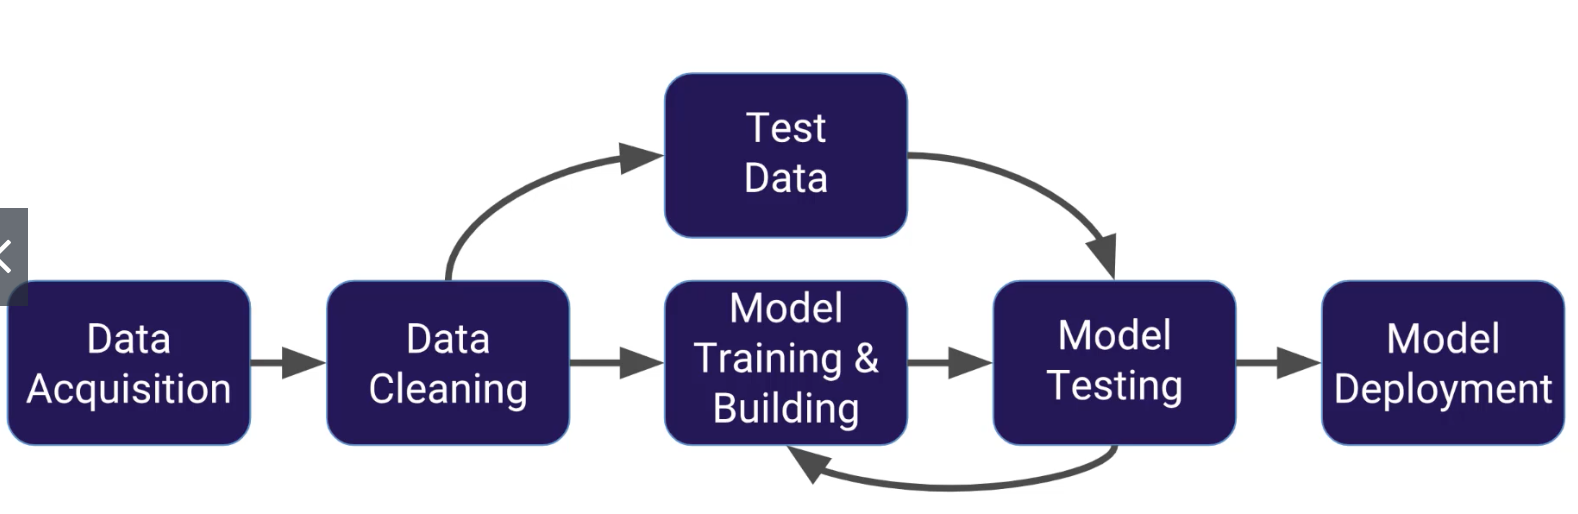

**Machine Learning Process**
- Step 1: get your data
- Step 2: data cleaning
    - clean/format using SciKit Learn and Vectorization
- Step 3: split data into a test set and a training set. 
    - on the training data, you are going to have your ML model learn/train off that training data. This is also known as fitting the model to the training data. Note: the training set is commonly about 70% of the total data. 
    - we take the model we just trained on, then we test it against that test dataset. Then we can evaluate how well the model actually performed using different evaluation metrics. After evaluating our model we can choose to improve our model by adjusting some parameters of the original ML algorithm. We can repeat this process until we are satisfied with out model's performance. Then we can deploy the model.
    
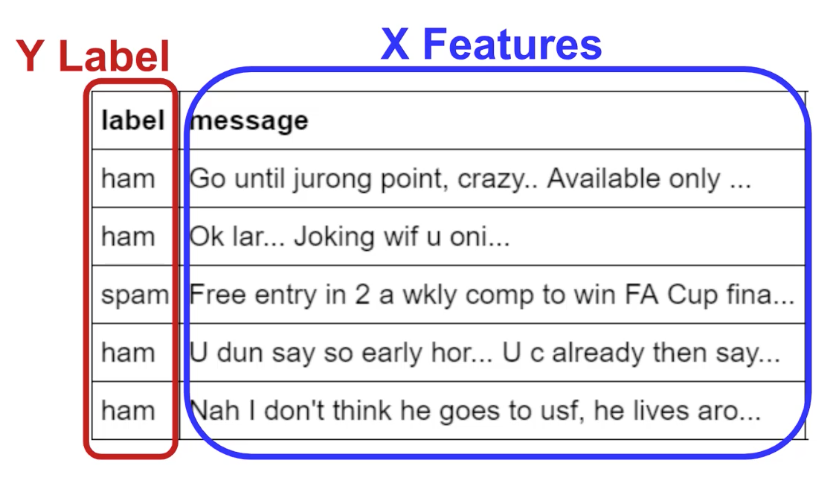


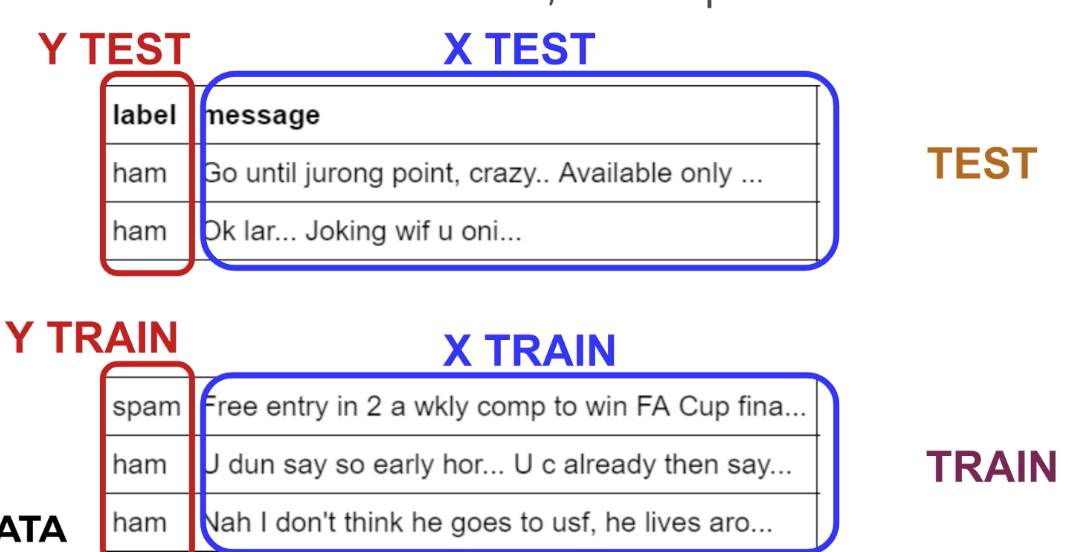

## Classification Metrics
The key classification metrics we need to understand are: 
- Accuracy 
- Recall
- Precision
- F1-score

What constitutes "good" metrics will really depend on the specific situation!

Typically in any classification task, your model can only achieve two results: 
- either your model was **correct** in its prediction 
- or your model was **incorrect** in its prediction

In our example, we will attempt to predict if a test is **Spam** or **Ham (legitimate)**. 
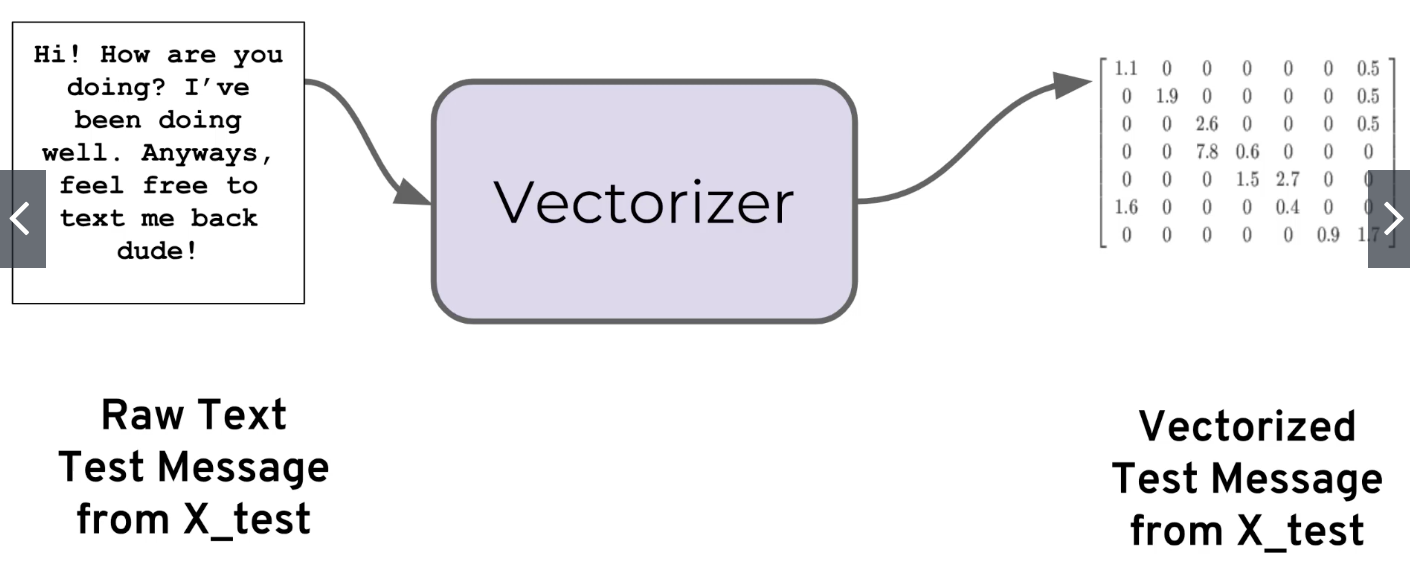

**Model Evaluation**
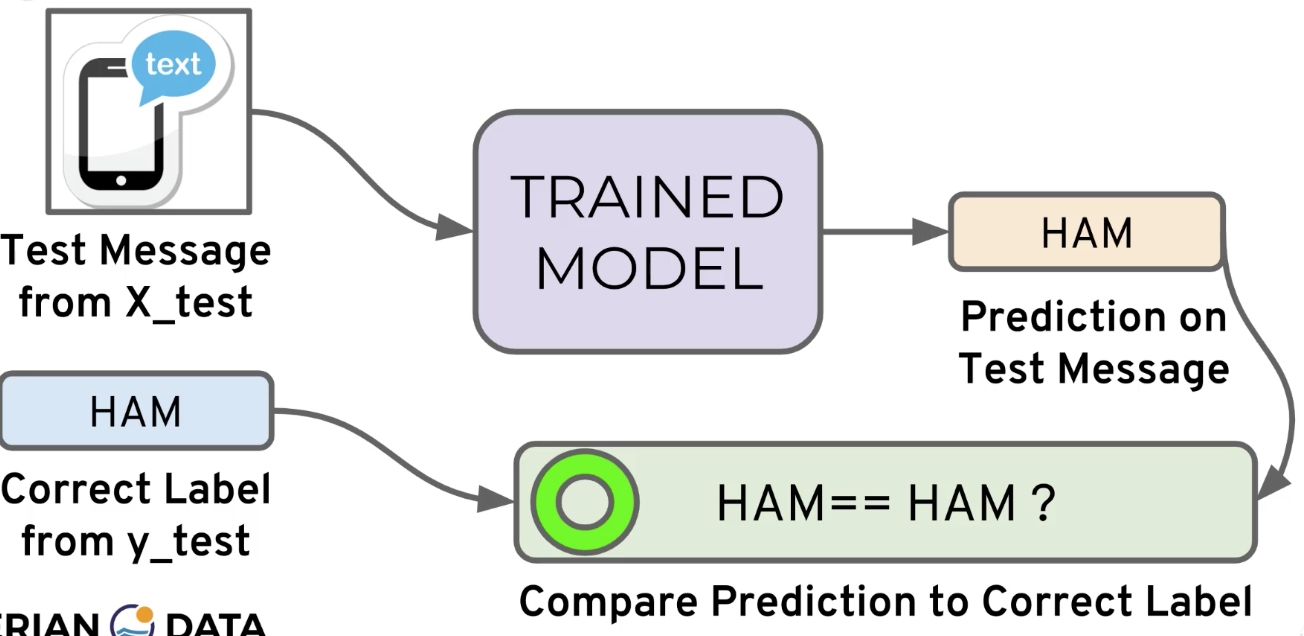
- we repeat this process for all the text messages in our X test data. At the end we will have a count of correct matches and a count of incorrect matches. We could organize our predicted values compared to the real values in a **confusion matrix**. 
- The key realization we need to make, is that **in the real world, not all incorrect or correct matches hold equal value!**
    - This is why we have those various classification metrics. It is not enough to understand the count we got correct and the count we got incorrect. It is various ratios that we need to take into account. 
    - In the real world, a single metric won't tell the complete story! 
- Accuracy
    - Accuracy in classification problems is the **number of correct predictions** made by the model divided by the **total number of predictions**. 
        - Accuracy = number of correct predictions/total number of predictions
    - Accuracy is useful when target classes are well balanced. In our example, that would mean that we have roughly the same amount of spam messages as we have ham messages.
    - Accuracy is **not** a good choice with **unbalanced** classes! In this situation we'll want to understand **recall** and **precision**. 

- Recall
    - Ability of a model to find **all** the relevant cases within a dataset. This is the number of true positives divided by the number true positives plus the number of false negatives. 
        - Recall = # true positives / (# true positives + # false negatives)
        
- Precision 
    - Ability of a classification model to identify **only** the relevant data points. This is the number of true positives divided by the number of true positives plus the number of false positives. 
        - Precision = # true positives / (# true positives + # false positives)
        
- Recall and Precision 
    - often you will have a trade-off between Recall and Precision
    - while recall expresses the ability to find all relevant instances in a dataset, precision expresses the proportion of the data points our model says are relevant are actually relevant
    
- F1-Score
    - In cases where we want to find an optimal blend of precision and recall, we can combine the two metrics using the F1 score. 
    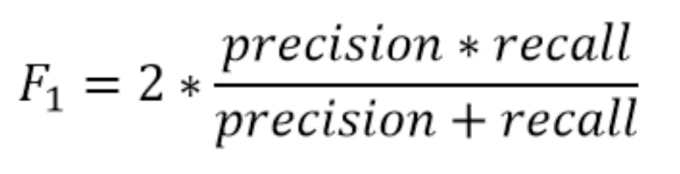
    - Above is the harmonic mean. We use the harmonic mean instead of a simple average because it punishes extreme values. 
    
**Confusion Matrix**
- if you have two possible classes, you should have 4 seperate groups at the end of testing: 
    - correctly classifiied to class 1
    - correctly classified to class 2
    - incorrectly classified to class 1
    - incorrectly classified to class 2
    
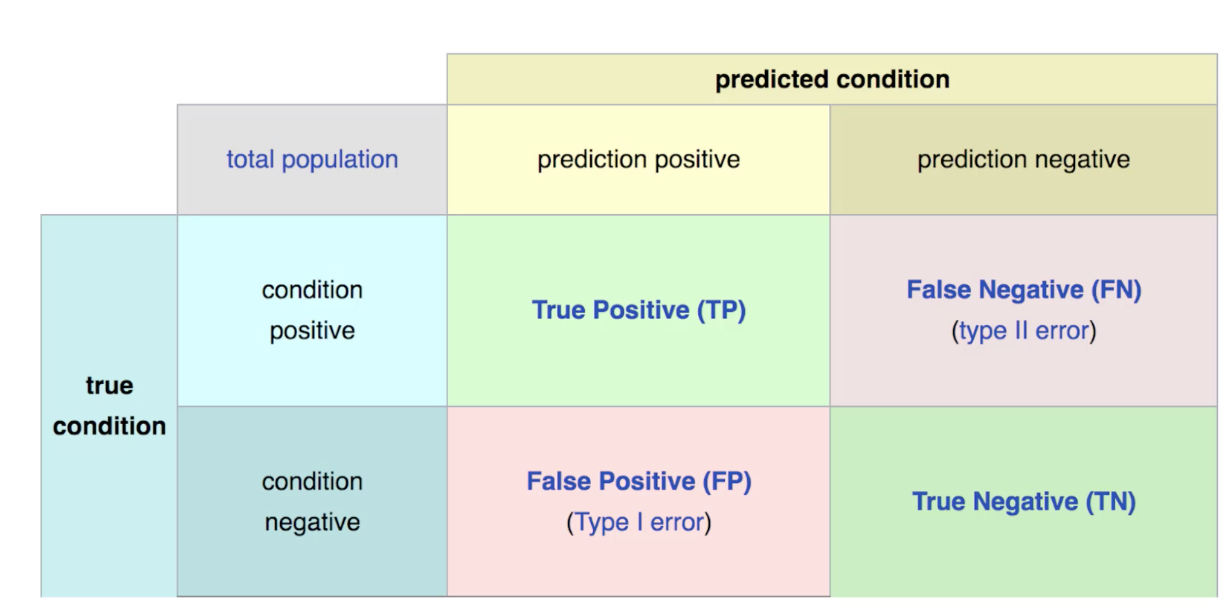

Missclassification Rate (Error Rate): 
- overall, how often is it wrong? 
    - (FP + FN)/total 

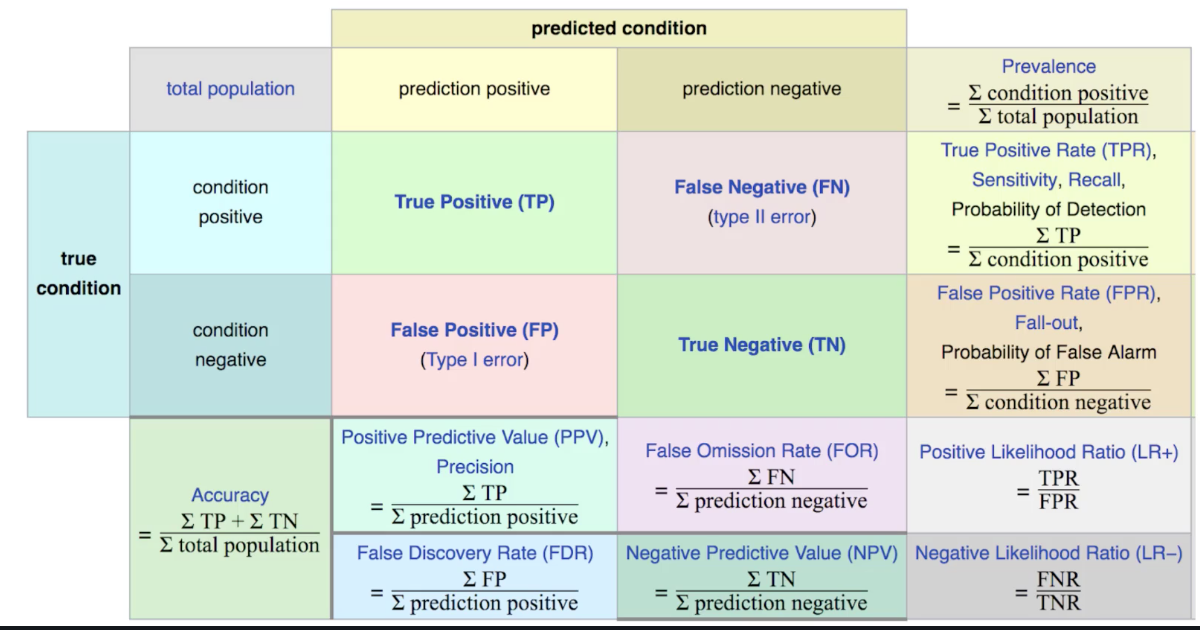

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('./TextFiles/smsspamcollection.tsv',sep = '\t')
df.head()

In [ ]:
# check for missing data
# .sum() will treat falses as 0's and if there is anything missing it will treat that as a 1
df.isnull().sum()

In [ ]:
# number of rows
len(df)

In [ ]:
df['label'].unique()

In [ ]:
df['label'].value_counts()

We are going to build a simple ML model that attempts to predict whether a message is ham or spam based solely on the length of the message and the punctuation. 

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))

plt.show()

Notice that spam messages look to be longer in length. 

In [ ]:
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# X is feature data

X = df[['length','punct']]

# y is our label
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

Random state - train_test_split is going to grab random rows. If you want to be able to repeat this sort of randomness you can provide a random_state. You will choose an arbitrary integer value to pass in. The actual value itself is meaningless. What matters is that you use the same value if you want to repeat this train_test_split. 

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver = 'lbfgs')

In [ ]:
lr_model.fit(X_train,y_train)

We will now test the accuracy of the model 

In [ ]:
from sklearn import metrics
predictions = lr_model.predict(X_test)

Now we will compare our predictions with y_test

In [ ]:
pd.DataFrame(metrics.confusion_matrix(y_test,predictions),
             index = ['ham','spam'],
             columns = ['ham','spam'])

In [ ]:
print(metrics.classification_report(y_test,predictions))

In [ ]:
print(metrics.accuracy_score(y_test,predictions))

Basic steps: 
1. Import the model 
2. create an instance of the model
3. fit the model
4. predict using the model
5. evaluate your predictions

**Text Feature Extraction**
- most classic machine learning algorithms can't take in raw text. 
- insteas we need to perform feature "extraction" from the raw text in order to pass numerical features to the machine learning algorithm. 
    - Count Vectorization
        - counts the occurences of all the unique words.
        - creates a document term matrix (DTM)
    - TfidfVectorizer
        - Instead of filling the DTM with token counts, it caculates term frequency-inverse document frequency value for each word (TF-IDF)
        - Term frequency **tf(t,d)** is the raw count of a term in a document. I.e., the number of times that term t occurs in document d.
            - term frequency alone isn't enough for a thorough feature analysis of the text. Think about common terms like "a" or "the". Because the term "the" is so common, term frequency will tend to incorrectly emphasize documents which happen to use the word "the" more frequently, without giving enough weight to more meaningful terms. 
            - An inverse document frequency factor diminishes the weight of terms that occur very frequently in the document set and increases the weight of terms that occur rarely. 
                - it is obtained by dividing the total number of documents by the number of documents containing the term, and then taking the logarithm of that quotient. 
                - TF-IDF = term frequency * (1/document frequency)
            - TF-IDF allows us to understand the context of words across an entire corpus of documents, instead of just its relative importance in a single document. 
                

In [ ]:
messages = ['Hey, lets go to the game today!',
            'Call your sister',
            'Want to go walk your dogs?']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit_transform(messages)
vect.get_feature_names()
dtm = vect.transform(messages)
print(dtm)

In [ ]:
pd.DataFrame(dtm.toarray(), columns=vect.get_feature_names())

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer()
dtm = vect.fit_transform(messages)
pd.DataFrame(dtm.toarray(),columns=vect.get_feature_names())

## Feature Extraction 

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('./TextFiles/smsspamcollection.tsv',sep='\t')
df.head()

In [ ]:
# check for missing values 
df.isnull().sum()

In [ ]:
df['label'].value_counts()

What we want to do now is take this raw text information and vectorize it. 

Fun fact: X is by convention capitalized while y is not. It has to do with the fact that X is a larger matrix. 

In [ ]:
from sklearn.model_selection import train_test_split

X = df['message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

In [ ]:
X_train_counts

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [ ]:
X_train_tfidf

Because it is so common to perform a CountVectorization followed by a Tfidf transformation, sklearn provides a Tfidf vectorization. This combines the steps of CountVectorization and TfidfTransformation into one single step.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)

In [ ]:
X_train_tfidf

In [ ]:
from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(X_train_tfidf,y_train)

Remember that only our training set has been vectorized into a full vocabulary. In order to perform an analysis on our test set, we would have to repeat all these same procedures. Sklearn provides a pipeline class that behaves like a compound clasifier. 

In [ ]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('tfidf',TfidfVectorizer()),
                      ('clf', LinearSVC())])

This pipeline object behaves like a normal classifier, however, what is convenient about this pipeline object is that it can perform all these steps for you in a single call. You can imagine that we could provide a lot more steps inside this list of tuples. 

In [ ]:
text_clf.fit(X_train,y_train)

In [ ]:
predictions = text_clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

In [ ]:
from sklearn import metrics
metrics.accuracy_score(y_test,predictions)

In [ ]:
text_clf.predict(['Hi how are you doing today?'])

In [ ]:
text_clf.predict(['Congratulations! You have been selected as a winner. TEXT WON to 44255'])

## Text Classification Code Along Project

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('./TextFiles/moviereviews.tsv',sep='\t')

In [ ]:
df.head()

In [ ]:
# check for missing values
df.isnull().sum()

In [ ]:
# remove nan reviews
df.dropna(inplace=True)

# check for missing values
df.isnull().sum()

However, whenever you are dealing with text data formatted like this it is important to understand that often databases will instead of putting a null value, they actually put an empty string. What we want to do is detect and remove empty strings. 

In [ ]:
blanks = [] # we will collect the index position of these blank statements

# (index,label,review text)
for i,lb,rv in df.itertuples():
    if rv.isspace():
        blanks.append(i)

In [ ]:
print(blanks)

In [ ]:
df.drop(blanks,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

X = df['review']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [ ]:
text_clf = Pipeline([('tfidf',TfidfVectorizer()),
                    ('clf',LinearSVC())])

In [ ]:
text_clf.fit(X_train,y_train)

In [ ]:
predictions = text_clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

## Semantics and Sentiment Analysis
In order to use Spacy's embedded word vectors, we must download the larger spacy english models. 
- word2vec is a two-layer neural net that processes text. 
- its input is a text corpus and its output is a set of vectors: feature vectors for words in that corpus. 
- the purpose and usefulness of Word2vec is to group the vectors of similar words together in vectorspace. That is, it detects similarities mathematically. 
- word2vec creates vectors that are distributed numerical representations of word features, features such as the context of individual words. 
- given enough data, usage and contexts, Word2vec can make highly accurate guesses abut a word's meaning based on past appearances. 
- those guesses can be used to establish a word's association with other words (e.g., "man" is to "boy" what "woman" is to "girl")
- word2vec trains words against other words that neighbor them in the input corpus. 
    - It does so in one of two ways, either using context to predict a target word (a method known as continous bag of words) or using a word to predict a target context, which is called skip-gram.
    
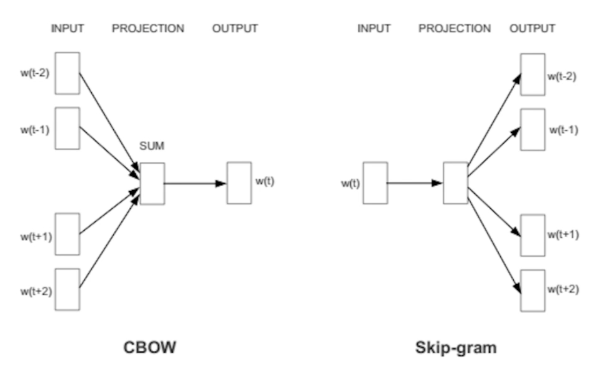

CBOW - you have several input words and then your projection is trying to predict what is the highest probability word to show up given the context of those surrounding words. 

Skip-gram - takes a little longer to train. Given an input of a single word, using the autoencoder neural netowork projection it outputs the weighted probabilities of the other words that are going to show up around the context of this input word. 

Recall that each word is now represented by a **vector**. 

In spact each of these vectors has 300 dimensions. 

Since we have each word mapped to a vector, we can use cosine similarity to measure how similar word vectors are to each other. Cosine similarity is just checking the distance between two vectors.In this case the vectors represent words. 

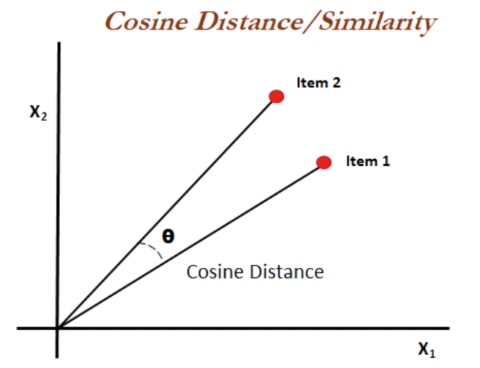

This means we can also perform vector arithmetic with the word vectors. This creates new vectors (not directly associated with a word) that we can then attempt to find most similar vectors to. 

In [ ]:
# !python -m spacy download en_core_web_lg


In [ ]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [ ]:
tokens = nlp(u'lion cat pet')

for token1 in tokens: 
    for token2 in tokens:
        print(token1.text,token2.text,token1.similarity(token2))

Keep in mind that words that have opposite meaning but often appear in the same context may have similar vectors. It is sometimes useful to aggregate 300 dimensions into a euclidean l2 norm. 

In [ ]:
len(nlp.vocab.vectors)

This means that there is 684831 unique words in the vocabulary that we have vectors for. 

In [ ]:
tokens = nlp(u"dog cat nargle")

for token in tokens: 
    print(token.text,token.has_vector,token.vector_norm, token.is_oov)

In [ ]:
from scipy import spatial

cosine_similarity = lambda vec1, vec2: 1 - spatial.distance.cosine(vec1,vec2)

In [ ]:
king = nlp.vocab['king'].vector
man = nlp.vocab['man'].vector
woman = nlp.vocab['woman'].vector

In [ ]:
# king - man + women --> New_vector similar Queen, princess, highness
new_vector = king - man + woman

In [ ]:
computed_similarities = []

# for all words in my vocab
for word in nlp.vocab:
    if word.has_vector:
        if word.is_lower: 
            if word.is_alpha:
                similarity = cosine_similarity(new_vector,word.vector)
                computed_similarities.append((word,similarity))

In [ ]:
computed_similarities = sorted(computed_similarities,key=lambda item:-item[1])

In [ ]:
print([t[0].text for t in computed_similarities[:10]])

## Sentiment Analysis 
- VADER (Valence Aware Dictionary for Sentiment Reasoning) is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. 
    - It is available in the NLTK package and can be applied directly to unlabeled text data. 
    - primarily VADER sentiment analysis relies on a dictionary which maps lexical features to emotion intensities called sentiment scores. 
    - the sentiment score of a text can be obtained by summing up the intensity of each word in the text
    - VADER is intelligent enough to understand basic context of these words, such as "did not love" as a negative sentiment. It even understands the contect behind capitalization (e.g., "LOVE!!!"). 
- Sentiment analysis on raw text is always challenging due to a variety of possible factors: 
    - positive and negative sentiment in the same text data
    - sarcasm using positive words in a negative way

In [2]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sarahamiraslani/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
sid = SentimentIntensityAnalyzer()

What VADER's SentimentIntensityAnalyzer() does is it takes in a string and returns a dictionary of scores in four categories (negative, neutral, positive, compound score). The comounds score is computed by normalizing the negative, neutral, and positive scores. The max value for any of these is 1.0. A compound score of 0 would be completely neutral, a compound score above 0 indicates some sort of positive score, and then a compound score below 0 indicates some sort of negative score. 

In [ ]:
a = "This is a good movie"
sid.polarity_scores(a)

In [ ]:
a = "This was the best, most awesome movie EVER MADE!!!"
sid.polarity_scores(a)

In [ ]:
a = "This was the WORST movie that has ever disgraced the screen"
sid.polarity_scores(a)

In [ ]:
ls

In [4]:
import pandas as pd
df = pd.read_csv('./TextFiles/amazonreviews.tsv',sep='\t')

In [ ]:
df.head()

In [ ]:
df['label'].value_counts()

In [5]:
df.dropna(inplace=True)

blanks = [] # we will collect the index position of these blank statements

# (index,label,review text)
for i,lb,rv in df.itertuples():
    if rv.isspace():
        blanks.append(i)
        
df.drop(blanks,inplace = True)

In [6]:
sid.polarity_scores(df.iloc[0]['review'])

{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'compound': 0.9454}

We want to apply sid polarity scores to every single review in our dataframe. 

In [ ]:
df['scores'] = df['review'].apply(lambda review: sid.polarity_scores(review))

In [ ]:
df.head()

In [ ]:
df['compound'] = df['scores'].apply(lambda d:d['compound'])

In [ ]:
df.head()

In [ ]:
df['comp_score'] = df['compound'].apply(lambda score: 'pos' if score >= 0 else 'neg')

In [ ]:
df.head()

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

accuracy_score(df['label'],df['comp_score'])

In [ ]:
print(classification_report(df['label'],df['comp_score']))

In [ ]:
print(confusion_matrix(df['label'],df['comp_score']))

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("./TextFiles/moviereviews.tsv",sep='\t')
df.head()

In [ ]:
df.dropna(inplace=True)

blanks = []

for i,lb,rv in df.itertuples():
    if rv.isspace():
        blanks.append(i)

df.drop(blanks,inplace=True)    

In [ ]:
df['label'].value_counts()

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
df['score'] = df['review'].apply(lambda review: sid.polarity_scores(review))

In [ ]:
df.head()

In [ ]:
df['compound'] = df['score'].apply(lambda d: d['compound'])

In [ ]:
df.head()

In [ ]:
df['comp_score'] = df['compound'].apply(lambda score: "pos" if score >= 0 else "neg")

In [ ]:
df.head()

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

accuracy_score(df['label'],df['comp_score'])

In [ ]:
print(classification_report(df['label'],df['comp_score']))

In [ ]:
print(confusion_matrix(df['label'],df['comp_score']))

## Topic Modeling
- Topic modeling allows us to efficiently analyze larg evolumes of text by clustering documents into topics
- a large amount of text data is **unlabeled** meaning we won't be able to apply our previous supervised learning approaches to create machine learning models for the data!
- if we have **unlabeled** data, then we can attmept to "discover" labels. 
- in the case of text data, this means attempting to discover clusters of documents, grouped together by topic. 
- a very important idea to keep in mind here is that it is very difficult to evaluate an unsupervised model's effectiveness because we didn't know the "correct" topic or "right answer" to begin with. 
- All we know is that the documents clustered together share similar topic ideas. It is up to the user to identify what these topics represent. 

### Latent Dirichlet Allocation
- Assumptions of LDA for Topic Modeling 
    - Documents with similar topics use similar groups of words
    - Latent topics can then be found by searching for groups of words that frequently occur together in documents across the corpus. 
    
We can think of these two assumptions mathematically. We can say that documents are probability distributions over latent topics. Topics themseleves are probability distributions over words. 

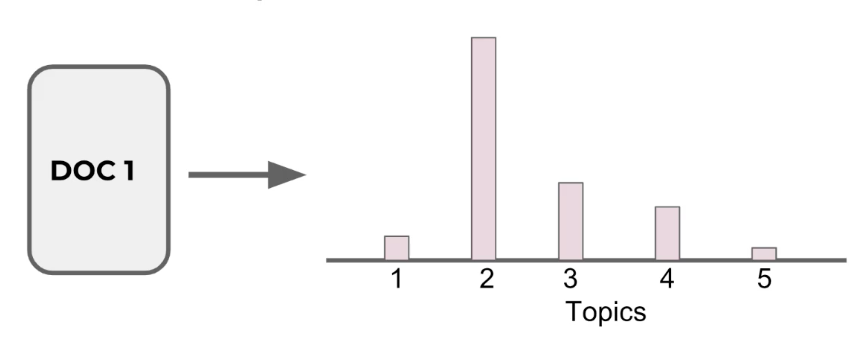

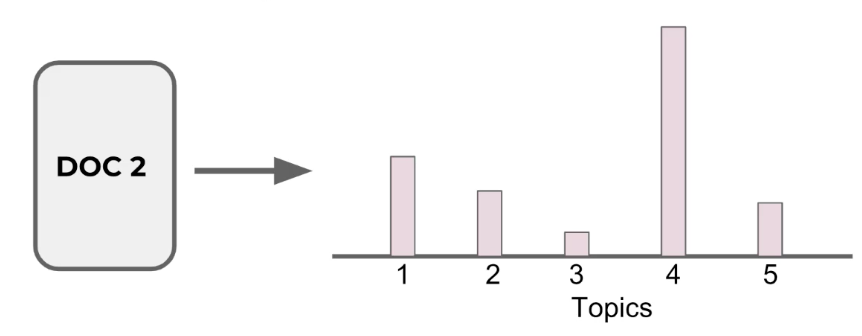

Notice here that we are not saying definitvely that doc1 or doc2 belong to any specific topic. Instead we are modeling them as having a probability distribution over a variety of latent topics. 

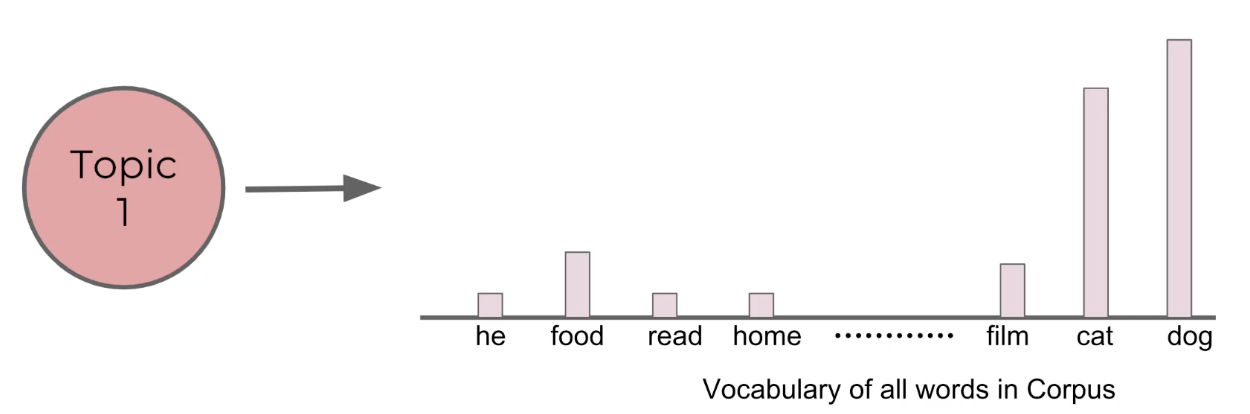

Remember that the LDA or unsupervised learning technique is not going to be able to tell you that directly. It is up to the user to interpret these probability distributions. 

- LDA represents documents as mixtures of topics that spit out words with certain probabilities 
    - it assumes that documents are produced in the following fashion: 
        - Decide on the number of words N the document wil have 
        - Choose a topic mixture for the document (according to a Dirichlet distribution over a fixed set of K topics)
        - e.g., 60% business, 20% politics, 10% food
        - Generate each word in the document by: 
            - first picking a topic according to the multinomial distribution that you sampled previously (60% business, 20% politics, 10% food)
            - using the topic to generate the word itself (according to the topic's multinomial distribution). 
            - for example, if we selected the food topic, we might generate the word "apple" with 60% probability, "home" with 30% probability, and so on. 
            
- Assuming this generatiive model for a collection of documents, LDA then tries to backtrack from the documents to find a set of topics that are likely to have generated the collection. 

- Now imagine we have a set of documents. 
- We've chosen some fixed number of K topics to discover, and want to use LDA to learn the topic representation of each document and the words associated to each topic. 
- Go through each document, and randomly assign each word in the document to one of the K topics. 
- This random assignment already gives you both topic representations of all the document and word distributions of all the topics (note, these initial random topics won't make sense).
- Now we iterate over every word in every document to improve these topics. 
- For every word in every document and for each topic t we calculate: 
    - p(topic t|document d) = the proportion of words in document d that are currently assigned to topic t.
    - p(word w|topic t) = the proportion of assignments to topic t over all documents that come from this word w. 
- Reassign w a new topic, where we choose topic t with probability p(topic t|document d) * p(word w|topic t)
- This is essentially the probability that topic t generated word w
- After repeating that previous step a large number of times, we eventually reach a roughly steady state where the assignments are acceptable. 
- At the end we have each document assigned to a topic. 
- We also can search for the words that have the highest probability of being assigned to a topic. 

Two important notes: 
- the user must decide on the amount of topics present in the document
- the user must interpret what the topics are

In [ ]:
pwd

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('./05-Topic-Modeling/npr.csv')

In [ ]:
df.head()

In [ ]:
df['Article'][0]

- max_df: when you are building up the vocabulary, we are going to ignore certain terms that have really high document frequency. This gets rid of terms that are really common across alot of the documents. e.g., max_df=0.9 is going to discard words that appear in 90% of documents
- min_df: eg., min_df = 2 means that the minimum document frequency for a word to be counted in this CountVectorizer, it has to show up in at least 2 documents. So it can't be totally unique to a single article. 
- stop_words = 'english' will lead CountVectorizer to automatically remove those stop words. 

For both max_df or min_df you can pass in either a ratio between 0 and 1. Or if you pass in an integer, it will take that into account as a raw number of documents. 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_df=0.9, min_df =2,stop_words = 'english')

In [ ]:
dtm = cv.fit_transform(df['Article'])

- n_components: this is where there really is no right or wrong answer. It depends on your domain knowledge and your familiarity with the dataset. 

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=7,random_state=42)
lda.fit(dtm)

In [ ]:
# Grab the topics 
lda.components_

# Grab the highest probability words per topic

In [ ]:
single_topic = lda.components_[0]
top_ten_words = single_topic.argsort()[-10:] # returns index positions 

In [ ]:
for index in top_ten_words: 
    print(cv.get_feature_names()[index])

In [ ]:
for i,topic in enumerate(lda.components_):
    print(f"The top 15 words for topic #{i}")
    print([cv.get_feature_names()[index] for index in topic.argsort()[-15:]])
    print('\n')
    print('\n')

In [ ]:
# Create a new column that has topic number
topic_results = lda.transform(dtm)

-argmax() returns the index position of the highest probability 

In [ ]:
topic_results[0].argmax()

In [ ]:
df['Topic'] = topic_results.argmax(axis=1)

In [ ]:
df.head()

# Non-Negative Matrix Factorization
- Non-negative Matrix Factorization is an unsupervised algorithm that simultaneously performs dimensionality reduction and clustering. 
- We can use it in conjunction with TF-IDF to model topics across documents. 
    1. Construct vector space model for documents (after stopword filtering), resulting in a term-document matrix A. 
    2. Apply TF-IDF term weight normalization to A. 
    3. Normalize TF-IDF vectors to unit length.
    4. Initialize factors using NNDSVD on A. 
    5. Apply Projected Gradient NMF to A. 
- **Basis vectors**: the topics (clusters) in the data. 
- **Coefficient matrix**: the membership weights for documents relative to each topic (cluster). 

Just like LDA, we will need to select the number of expected topics beforehand (the value of **k**). Also just like LDA, we will have to interpret the topics based off the coefficient values of the words per topic. 

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('./05-Topic-Modeling/npr.csv')

In [ ]:
df.head()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_df=0.95,min_df=2,stop_words ='english')
dtm = tfidf.fit_transform(df['Article'])

In [ ]:
from sklearn.decomposition import NMF

nmf_model = NMF(n_components=7,random_state=42)
nmf_model.fit(dtm)

In [ ]:
for index,topic in enumerate(nmf_model.components_):
    print(f"The top 15 words for topic #{index}")
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

In [ ]:
topic_results = nmf_model.transform(dtm)

In [ ]:
df['Topic'] = topic_results.argmax(axis=1)

mytopic_dict = {0:'health', 1:'poltics', 2:'health care', 3:'national security' , 4:'election',5:'music',6:'eduction'}

df['Topic_label'] = df['Topic'].map(mytopic_dict)

In [ ]:
df.head()

## Deep Learning
- An artificial neuron is known as a perceptron
- inputs are multiplied by a weight. Weights initially start off as random. Then these results are passed to an activation function. 
    - changing the activation function used can be beneficial depending on the task.
    - Common activation functions: 
        - sigmoid
        - hyperbolic tangent
        - Rectified Linear Unit (ReLu)
            - ReLu tends to have the best performance

## Introduction to neural networks 
- Input layers
    - Real values from the data
- Hidden Layers
    - Layers in between input and output
    - 3 or more layers is "deep network"
- Output layer
    - Final estimate of the output
    
As you go forward through more layers, the level of abstraction increases. 

In [ ]:
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()

In [ ]:
X = iris.data
y = iris.target

##### One hot encoding 

class 0 --> [1,0,0]

class 1 --> [0,1,0]

class 2 --> [0,0,1]

In [ ]:
from keras.utils import to_categorical

y = to_categorical(y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

For neural networks it is a good idea to scale or standardize your data. 
- MinMaxScaler makes all the values fit between a range (e.g., 0 - 1). It essentially divides by the max value to make sure that everything fits between 0 and 1. Typically this helps the weights and biases from growing too large. 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler_object = MinMaxScaler()
scaler_object.fit(X_train)
scaled_X_train = scaler_object.transform(X_train)
scaled_X_test = scaler_object.transform(X_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

# add a layer
model.add(Dense(units=8,input_dim=4,activation='relu'))

# add a layer
model.add(Dense(units=8,input_dim=4,activation='relu'))

# add output layer
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics =['accuracy'])

In [ ]:
model.summary()

In [ ]:
model.fit(scaled_X_train,y_train,epochs=150,verbose=2)

In [ ]:
model.predict(scaled_X_test)

Notice that it doesn't predict the one hot encoded version of the classes. 

In [ ]:
predictions = model.predict_classes(scaled_X_test)

In [ ]:
y_test.argmax(axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

confusion_matrix(y_test.argmax(axis=1),predictions)

In [ ]:
print(classification_report(y_test.argmax(axis=1),predictions))

In [ ]:
accuracy_score(y_test.argmax(axis=1),predictions)

In [ ]:
model.save('myfirstmodel.h5') # this saves all the weights of the network so that we can load it up again

In [ ]:
from keras.models import load_model

new_model = load_model('myfirstmodel.h5')

## Recurrent Neural Networks
Recurrent neural networks are specifically designed to work with sequence data.
- Examples of sequences
    - Time series data (sales)
    - Sentences
    - Audio
    - Car Trajectories
    - Music
    
- An issue RNN face is that after awhile the network will begin to "forget" the first inputs, as information is lost at each step going through the RNN. 
- We need some sort of "long-term memory" for our networks. 
    - The LSTM (Long Short-Term Memory) cell was created to help address these RNN issues. 

In [ ]:
def read_file(filepath):
    with open(filepath) as f: 
        str_text = f.read()
    return str_text

In [ ]:
# Tokenize and clean text 
import spacy
nlp = spacy.load('en',disable=['parser','tagger','ner'])

We want to get rid of things like periods and newlines. Since they show up so often, they are likely not useful for training purposes. 

In [ ]:
def seperate_punc(doc_text):
    return [token.text.lower() for token in nlp(doc_text) if token.text not in '\n\n \n\n\n!"-#$%&()--.*+,-/:;<=>?@[\\]^_{|}~\t']

In [ ]:
d = read_file('./TextFiles/moby_dick_four_chapters.txt')

In [ ]:
tokens = seperate_punc(d)

In [ ]:
print(tokens)

We are going to pass in 25 words and have the neural network predict the next word. The idea here is that 25 words is long enough to grab the structure of a sentence. 

In [ ]:
train_len = 26
text_sequences = []

for i in range(train_len,len(tokens)): 
    seq = tokens[i-train_len:i]
    text_sequences.append(seq)

In [ ]:
' '.join(text_sequences[0])

In [ ]:
' '.join(text_sequences[1])

In [ ]:
' '.join(text_sequences[2])

We need to use Keras tokenization to format this into a numerical system that keras can understand.

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_sequences)

sequences = tokenizer.texts_to_sequences(text_sequences)

What we have done here is we have replaced our original text sequences to sequences that happen to have numbers in place of these words. Each of these numbers is an id for a particular word.

In [ ]:
sequences[0]

In [ ]:
sequences[1]

In [ ]:
tokenizer.index_word

In [ ]:
for i in sequences[0]:
    print(f"{i} : {tokenizer.index_word[i]}")

In [ ]:
vocabulary_size = len(tokenizer.word_counts)
vocabulary_size # the number of unique words

In [ ]:
import numpy as np
sequences = np.array(sequences)

In [ ]:
print(sequences)

In [ ]:
from keras.utils import to_categorical

# grab all cols except the last
X = sequences[:,:-1]

In [ ]:
# grab the last col
y = sequences[:,-1]

In [ ]:
y = to_categorical(y,num_classes = vocabulary_size+1)

In [ ]:
seq_len = X.shape[1]

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Embedding 

In [ ]:
def create_model(vocabulary_size, seq_len):
    model = Sequential()
    model.add(Embedding(input_dim = vocabulary_size,
                        output_dim = seq_len,
                        input_length = seq_len))
    model.add(LSTM(units = 50,
                   return_sequences = True))
    model.add(LSTM(units = 50))
    model.add(Dense(units = 50,
                    activation = 'relu'))
    model.add(Dense(vocabulary_size,
                    activation = 'softmax'))
    model.compile(loss = 'categorical_crossentropy',
                  optimizer = 'adam',
                  metrics = ['accuracy'])
    model.summary()
    return model

In [ ]:
model = create_model(vocabulary_size+1,seq_len)

In [ ]:
from pickle import dump,load
model.fit(X,y,batch_size=128,epochs=2,verbose=1)

In [ ]:
model.save('my_mobydick_model.h5')
dump(tokenizer,open('my_simple_tokenizer','wb'))

In [ ]:
from keras.preprocessing.sequence import pad_sequences

In [ ]:
def generate_text(model,tokenizer,seq_len,seed_text,num_gen_words):
    
    output_text = []
    
    input_text = seed_text
    
    for i in range(num_gen_words):
        encoded_text = tokenizer.texts_to_sequences([input_text])[0]
        pad_encoded = pad_sequences([encoded_text],
                                    maxlen=seq_len,
                                    truncating ='pre')
        pred_word_ind = model.predict_classes(pad_encoded,verbose=0)[0]
        pred_word = tokenizer.index_word[pred_word_ind]
        input_text += ' '+pred_word
        output_text.append(pred_word)
    
    return ' '.join(output_text)

In [ ]:
import random 
random_pick = random.randint(0,len(text_sequences))
random_seed_text = text_sequences[random_pick]

In [ ]:
seed_text = ' '.join(random_seed_text)

In [ ]:
seed_text

In [ ]:
generate_text(model,tokenizer,seq_len,seed_text=seed_text,num_gen_words = 25)

In [ ]:
from keras.models import load_model
model = load_model('./06-Deep-Learning/epochBIG.h5')

In [ ]:
tokenizer = load(open('./06-Deep-Learning/epochBIG','rb'))

In [ ]:
generate_text(model,tokenizer,seq_len,seed_text=seed_text,num_gen_words = 25)

## Chatbots 
- Model takes a discrete set of inputs **x1,...,xn** that are to be stored in the memory, a query **q**, and outputs an answer **a**
- Each of the **x**, **q**, and **a** contain symbols coming from a dictionary with **v** words. 
- The model writes all **x** to the memory up to a fixed buffer size, and then finds a continous representation for the **x** and **q**

There are three components to the end to end network: 
- Input Memory Representation 
- Output Memory Representation
- Generating Final Prediction

In [ ]:
import pickle
import numpy as np

with open('./06-Deep-Learning/train_qa.txt','rb') as f: 
    train_data = pickle.load(f)
    
with open('./06-Deep-Learning/test_qa.txt','rb') as f: 
    test_data = pickle.load(f)

In [ ]:
' '.join(train_data[0][0])

In [ ]:
' '.join(train_data[0][1])

In [ ]:
train_data[0][2]

What we want to do is set up a vocabulary for all the words inside our dataset.

In [ ]:
all_data = test_data + train_data

vocab = set()

for story,question,answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))
    
vocab.add('no')
vocab.add('yes')

In [ ]:
vocab_len = len(vocab)+1

In [ ]:
# Longest story 
max_story_len = max([len(data[0]) for data in all_data])
max_question_len = max([len(data[1]) for data in all_data])

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(filters='')
tokenizer.fit_on_texts(vocab)

tokenizer.word_index

In [ ]:
train_story_text = []
train_question_text = []
train_answers = []

for story,question,answer in train_data: 
    train_story_text.append(story)
    train_question_text.append(question)
    train_answers.append(answer)

In [ ]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [ ]:
def vectorize_stories(data,word_index=tokenizer.word_index,max_story_length=max_story_len,max_question_len = max_question_len): 
    
    X = []
    Xq = []
    Y = []
    
    for story,question,answer in data: 
        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in question]
        
        y = np.zeros(len(word_index)+1)
        y[word_index[answer]] = 1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    return (pad_sequences(X,maxlen=max_story_len),pad_sequences(Xq,max_question_len),np.array(Y))

In [ ]:
inputs_train, questions_train, answers_train = vectorize_stories(train_data)

In [ ]:
inputs_test, questions_test, answers_test = vectorize_stories(test_data)

In [ ]:
from keras.models import Sequential,Model
from keras.layers.embeddings import Embedding
from keras.layers import Input,Activation,Dense,Permute,Dropout,add,dot,concatenate,LSTM

input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

vocab_size = len(vocab)+1
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))

input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))

question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,output_dim=64,input_length=max_question_len))
question_encoder.add(Dropout(0.3))

In [ ]:
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [ ]:
match = dot([input_encoded_m,question_encoded],axes=(2,2))
match = Activation('softmax')(match)

In [ ]:
response = add([match,input_encoded_c])
response = Permute((2,1))(response)

In [ ]:
answer = concatenate([response,question_encoded])

In [ ]:
answer

In [ ]:
answer = LSTM(32)(answer)
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)

In [ ]:
answer = Activation('softmax')(answer)
model = Model([input_sequence,question],answer)
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
history = model.fit([inputs_train,questions_train],answers_train,batch_size=32,epochs=50,validation_data = ([inputs_test,questions_test],answers_test))

## Plotting out Training History

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()